# 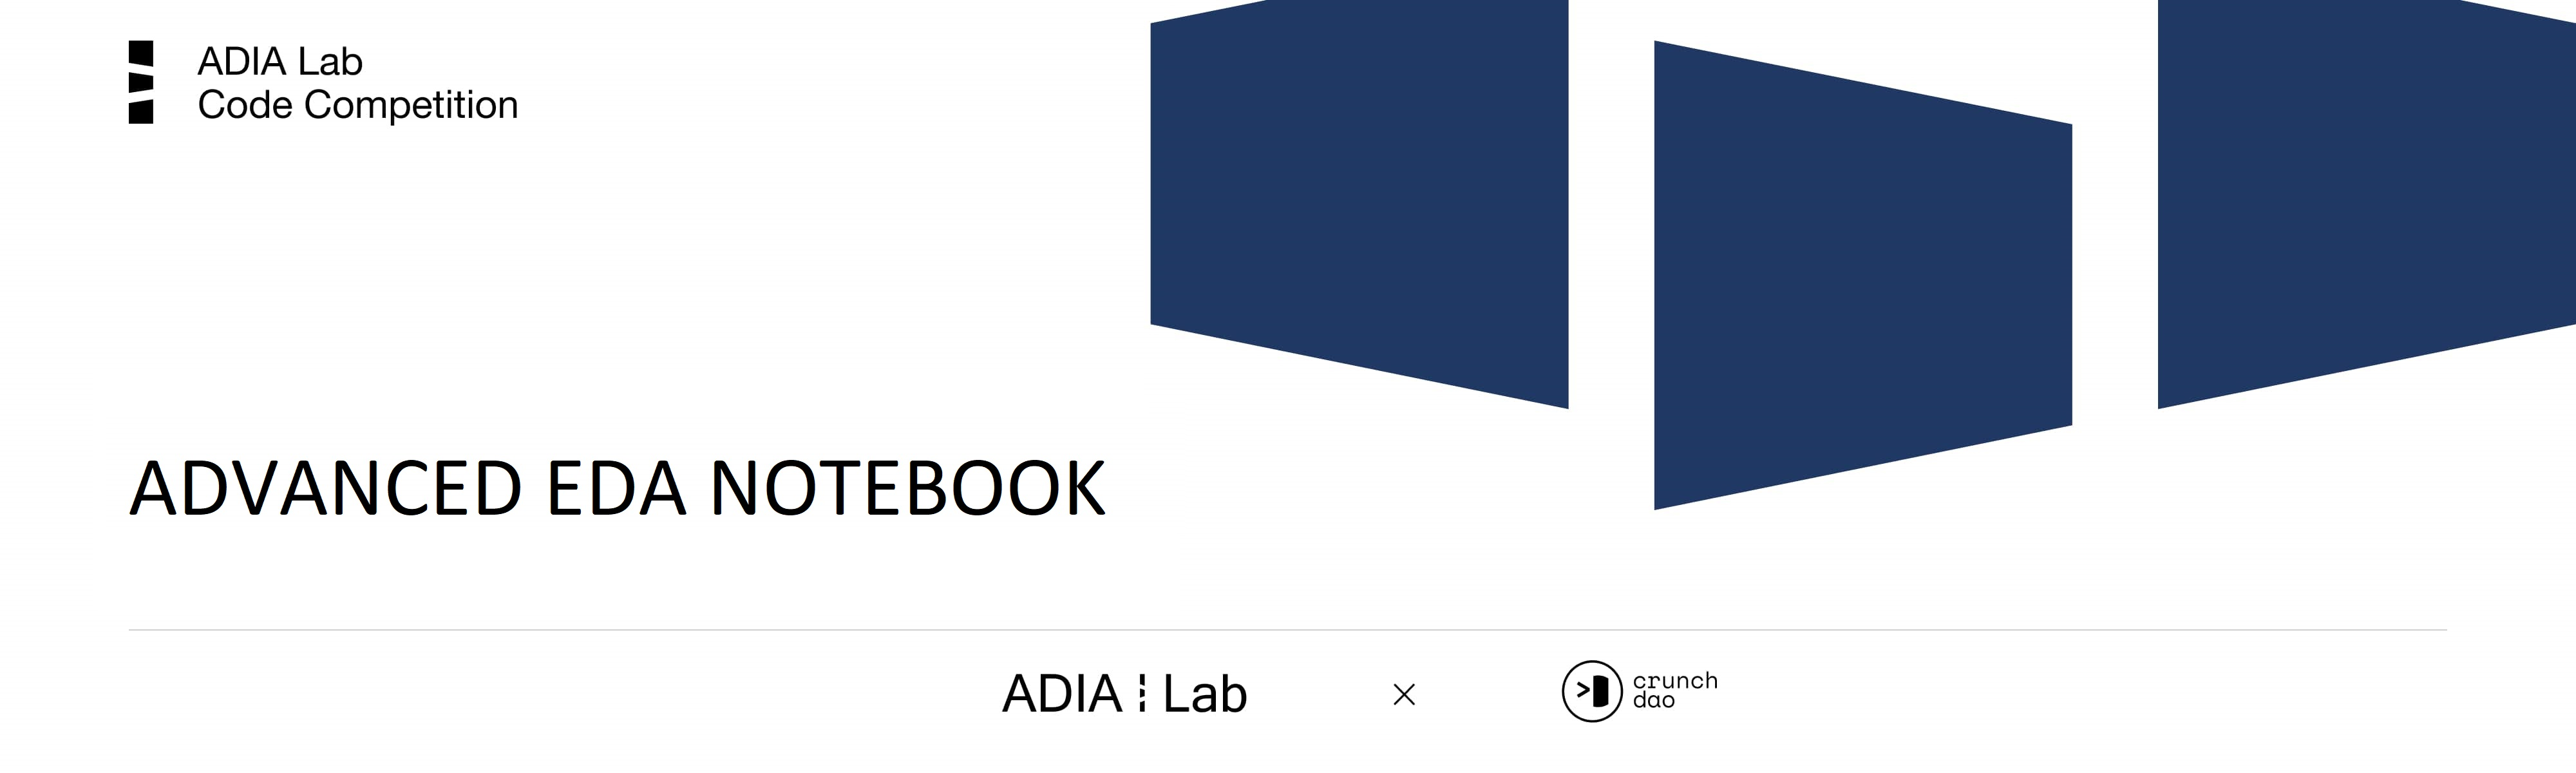

## ADIA Lab Market Prediction Competition - Tutorial Notebook

The goal of this notebook is both to introduce the participants to the competition, as well as to suggest some potential starting points. Suggestions here depicted are of course not obligatory and arbitrarily different directions can be pursued.

### Exploratory Data Analysis

Let us now begin to better understand our problem by looking at the data.

In [1]:
import matplotlib.pyplot as plt
from tqdm import tqdm
import pandas as pd
import numpy as np
import warnings
warnings.filterwarnings('ignore') # This is not advised in general, but it is used in this notebook to clean the presentation of results

In [2]:
import os

In [3]:
os.chdir(path=os.getcwd().split(sep='adialab-notebooks')[0])

In [4]:
# Getting the data
X_train = pd.read_parquet('narrow-oskar/data/X_train.parquet')
y_train = pd.read_parquet('narrow-oskar/data/y_train.parquet')
X_test = pd.read_parquet('narrow-oskar/data/X_test.parquet')

In [5]:
X_train.head(10)

,date,id,0,1,2,3,4,5,6,7,...,451,452,453,454,455,456,457,458,459,460
0,0,dae29c8061b3176b9208f26afbb96e2ca50886db41902d...,-0.909515,0.388808,-1.535913,-0.133312,-1.826404,-0.532795,0.351273,0.158866,...,-0.731349,-0.456020,-0.257331,0.396074,0.318007,-0.538754,-0.625193,-0.753419,0.154403,1.069385
1,0,2f71f1b5d49fbd131351df95848dc91ab14662af62d4d0...,-0.107694,-0.097967,-0.539599,-0.331276,-0.942609,-0.054123,-1.212772,1.688034,...,0.610428,-0.984907,-0.429806,0.199055,0.202587,1.612578,0.302153,-0.165713,0.905807,0.083180
2,0,b8d41ef950b69f94c380410f59f47e15666c57b74573b6...,0.092316,0.052596,-0.652025,1.218241,0.382968,-0.861838,-0.318937,-0.744261,...,0.212365,-0.046016,1.147463,0.696961,-0.574426,1.255969,0.270394,1.272939,-0.643112,0.433585
3,0,cdce060d04ce28a551eaab653cc4b01f5ad878aeb932ec...,4.119639,1.018918,3.687519,1.597563,0.055918,-1.406041,0.652994,0.251138,...,1.254787,-1.155922,-1.108540,-2.046100,1.311100,-0.322965,0.999248,-1.238640,0.882844,-1.333590
4,0,86f6e6d9407ad3abfab91a3bbfb7ad71553e3f968765b8...,0.109644,-0.290280,-0.278987,-0.603259,0.136952,-1.725076,-0.062219,-0.183102,...,-2.007721,-0.482311,-0.269142,-0.899796,1.083332,0.674665,-1.095657,-0.402669,0.677189,0.319992
5,0,cd75786a46232a23b4e8f3e99b1045d0356426f88683e7...,0.397928,1.718154,0.970919,1.019976,-0.523070,1.000975,-1.350520,-0.095668,...,-0.714534,0.489504,-0.306691,2.064491,2.592456,0.888025,-1.512641,-1.164311,0.671042,-0.636903
6,0,9e194bf6a6663e2d71d120e7adcc7bb18416b8d43773ee...,0.926838,-1.608715,0.493489,-0.310964,-0.365767,-0.056785,0.248412,-0.005730,...,1.145286,-0.538777,0.455596,-0.845395,-2.115909,-0.164008,1.366854,0.020719,1.640821,1.623944
7,0,413eb24dbf37909b4023869809f4b0644bebfb376480b1...,-0.164051,1.711846,-0.000396,-0.074890,-0.515565,-0.162335,-0.317261,-0.068936,...,-1.154838,-1.438494,-0.277575,0.695643,0.506417,-0.304206,-0.306456,-0.810076,0.568860,0.568094
8,0,87ed8e2b2b32bf2ecddd0fbc723a186ba565dcf218a2fc...,-0.346972,-0.237940,-0.035638,-1.131278,-0.236790,0.141671,0.896292,-0.020427,...,-0.061339,-0.009924,-0.604464,0.237509,0.194966,0.923204,0.339524,-0.593550,-0.906084,0.195482
9,0,a6b69417add3ecfb23d061aca5b370e35de6802c90033f...,-0.554354,0.009493,-0.377920,0.054719,1.112429,-0.886331,-1.421340,-1.212338,...,1.247905,-0.156586,-0.016467,-0.764956,-1.974748,0.114405,-0.479952,-0.558842,-0.774358,-0.466825


In [6]:
X_train.tail(10)

,date,id,0,1,2,3,4,5,6,7,...,451,452,453,454,455,456,457,458,459,460
742660,268,d6a942b820528c239526a65f1fe800b3c778048c5f8847...,-0.340461,-0.103389,1.151840,0.093108,0.171956,-0.976130,0.487295,0.507374,...,-0.404472,-0.710613,-0.996532,1.704882,1.529502,0.081023,0.278885,-2.469301,-0.031191,1.174109
742661,268,00562d1a3f5476fdfa7f05cf72e0276c1b19fa94f5cca7...,0.585391,1.865559,2.541137,0.310140,0.321184,0.026073,-2.871843,-0.405057,...,-0.207991,2.203718,1.593438,0.557919,1.810860,1.040724,-2.764507,1.352590,-0.530843,0.715589
742662,268,659c8525cf63a6354827797f1a4e77d5db9ac6ab5e52c5...,0.098177,0.114282,0.361992,0.598120,-0.964748,-0.794324,1.677189,-0.261110,...,-0.277295,1.068419,-0.030766,0.252300,-0.661896,1.026589,0.501399,0.528480,-1.842850,-0.610431
742663,268,b620782b86a522f894c4d7d34d34ab17b356a9bd2474e2...,0.663984,-1.511912,0.319041,-0.440753,0.168388,-1.429886,0.227062,-0.580991,...,-1.308222,-1.990779,-0.543305,-0.585537,0.874387,-0.150639,-1.166345,-1.082864,1.150423,-0.695400
742664,268,aaa4c49bc07b54013ff4139b34f8f0c50cc7aef793464f...,0.847355,2.024961,0.762905,-1.862978,2.385060,0.929991,-2.952941,0.859300,...,-0.682187,-0.762881,-0.543481,-0.911786,-0.115666,2.084377,-2.067182,1.758014,-1.336606,-0.630265
742665,268,5a18ddc0f252fa17cbd2a5bfe2f3786c0afb5052dd92be...,0.790984,1.560877,-0.328996,-0.190068,0.314971,-0.001609,0.313957,-0.315743,...,-1.450422,-1.044100,0.631455,-1.322626,-0.407846,0.578026,0.830650,1.414314,-0.845734,0.399335
742666,268,73c197cf1cb75641710562fe26d4f562c8228847a67949...,-1.129492,0.696247,-1.494771,-0.404022,0.909996,-0.658659,0.688591,1.634416,...,-0.475011,0.319023,-1.038112,0.222924,0.804017,-0.969177,-1.011879,-0.921781,-0.067543,0.491890
742667,268,bad7ff9ebc5579589e5ef36cb58f962c90c864fd3dfb22...,1.656413,-1.267060,0.748902,-0.196263,0.831206,-1.590837,3.079856,0.498583,...,-0.010330,-0.426130,-0.624393,-0.236483,-0.244052,1.280749,-2.001158,-1.036838,-1.959235,-2.534523
742668,268,5b968ca44ac0550be6f31470a96e572cd1c58d36cc26c7...,0.282704,0.156104,-1.165022,0.513334,-1.111948,-1.368465,-1.347184,-0.926533,...,0.411093,0.225324,-0.112838,-0.366831,-0.385833,-0.301606,0.395659,-0.895311,-0.819201,-0.996246
742669,268,a42ec1ac915edb35b440184ca52015bf3fdba53c631b1f...,-0.813073,-0.824916,-0.368725,0.136837,0.270865,0.710876,0.734015,-1.233695,...,0.134728,0.133413,-0.904207,-0.430508,-1.598422,-0.819337,0.012623,0.624302,-0.532539,0.105044


All values other than those in **date** and **id** columns seem numerical, continuous and well-behaved, although we need more exploration to fully convince ourselves.

In [7]:
X_train.shape

(742670, 463)

The dataset seems reasonably big, we will check its memory consumption, and if necessary implement measures to address excess of memory usage.

In [8]:
X_train.describe()

,date,0,1,2,3,4,5,6,7,8,...,451,452,453,454,455,456,457,458,459,460
count,742670.000000,7.426700e+05,7.426700e+05,7.426700e+05,7.426700e+05,7.426700e+05,7.426700e+05,7.426700e+05,7.426700e+05,7.426700e+05,...,7.426700e+05,7.426700e+05,7.426700e+05,7.426700e+05,7.426700e+05,7.426700e+05,7.426700e+05,7.426700e+05,7.426700e+05,7.426700e+05
mean,159.526463,1.284116e-10,1.540939e-11,-2.825055e-11,-6.163756e-11,1.348322e-10,-2.568232e-12,-7.191048e-11,1.335480e-10,-3.467113e-11,...,8.218341e-11,1.130022e-10,-1.027293e-11,-2.028903e-10,8.218341e-11,-1.540939e-11,-1.181387e-10,-7.704695e-11,-1.232751e-10,1.849127e-10
std,69.838953,1.000001e+00,1.000001e+00,1.000001e+00,1.000001e+00,1.000001e+00,1.000001e+00,1.000001e+00,1.000001e+00,1.000001e+00,...,1.000001e+00,1.000001e+00,1.000001e+00,1.000001e+00,1.000001e+00,1.000001e+00,1.000001e+00,1.000001e+00,1.000001e+00,1.000001e+00
min,0.000000,-6.261024e+00,-5.071468e+00,-4.707472e+00,-9.938923e+00,-6.866098e+00,-6.654506e+00,-1.001759e+01,-9.518451e+00,-7.745412e+00,...,-8.473229e+00,-4.633243e+00,-8.560513e+00,-4.718935e+00,-7.037115e+00,-4.417604e+00,-9.344660e+00,-5.903621e+00,-1.334405e+01,-1.028470e+01
25%,110.000000,-6.739395e-01,-6.541329e-01,-6.802955e-01,-5.891749e-01,-6.684516e-01,-6.526968e-01,-5.842146e-01,-6.634518e-01,-6.518828e-01,...,-6.648314e-01,-6.994224e-01,-6.662166e-01,-6.315326e-01,-6.802900e-01,-6.629974e-01,-6.558463e-01,-6.724783e-01,-6.729455e-01,-6.233730e-01
50%,163.000000,-2.538679e-02,-3.315788e-02,-1.790448e-02,3.379633e-02,-1.937055e-02,-5.407786e-03,4.602176e-02,7.003009e-03,-1.642204e-02,...,-2.929448e-03,-3.116671e-02,-2.230417e-03,-6.742083e-03,1.107542e-02,-4.374430e-02,2.156746e-02,2.368831e-03,2.270385e-03,1.908572e-02
75%,220.000000,6.563462e-01,6.099522e-01,6.501519e-01,6.565697e-01,6.498887e-01,6.430400e-01,6.505666e-01,6.668940e-01,6.300462e-01,...,6.564976e-01,6.558738e-01,6.619603e-01,6.061414e-01,6.775671e-01,6.045398e-01,6.844997e-01,6.601428e-01,6.774270e-01,6.585824e-01
max,268.000000,5.421272e+00,9.006263e+00,7.850448e+00,4.292451e+00,9.759359e+00,6.516186e+00,4.168461e+00,5.217637e+00,1.240517e+01,...,9.845173e+00,1.008965e+01,5.559939e+00,1.017363e+01,6.631126e+00,9.228049e+00,4.661901e+00,6.826565e+00,5.865996e+00,4.717035e+00


In [9]:
X_train.nunique()

date       269
id      742670
0       738465
1       738611
2       738495
         ...  
456     738565
457     738468
458     738541
459     738443
460     738557
Length: 463, dtype: int64

The **id** column does not look informative if used as is in a prediction setting, since it has as many differentiated categorical values as the whole dataset. We will eliminate it in this notebook at training and inference times. The **date** column covers a relatively short number of points in time. Let us now check the distribution of data points across dates.

In [10]:
max_date = np.max(X_train['date']) + 1
max_feats = len(X_train.columns) 
print(max_date,max_feats)

269 463


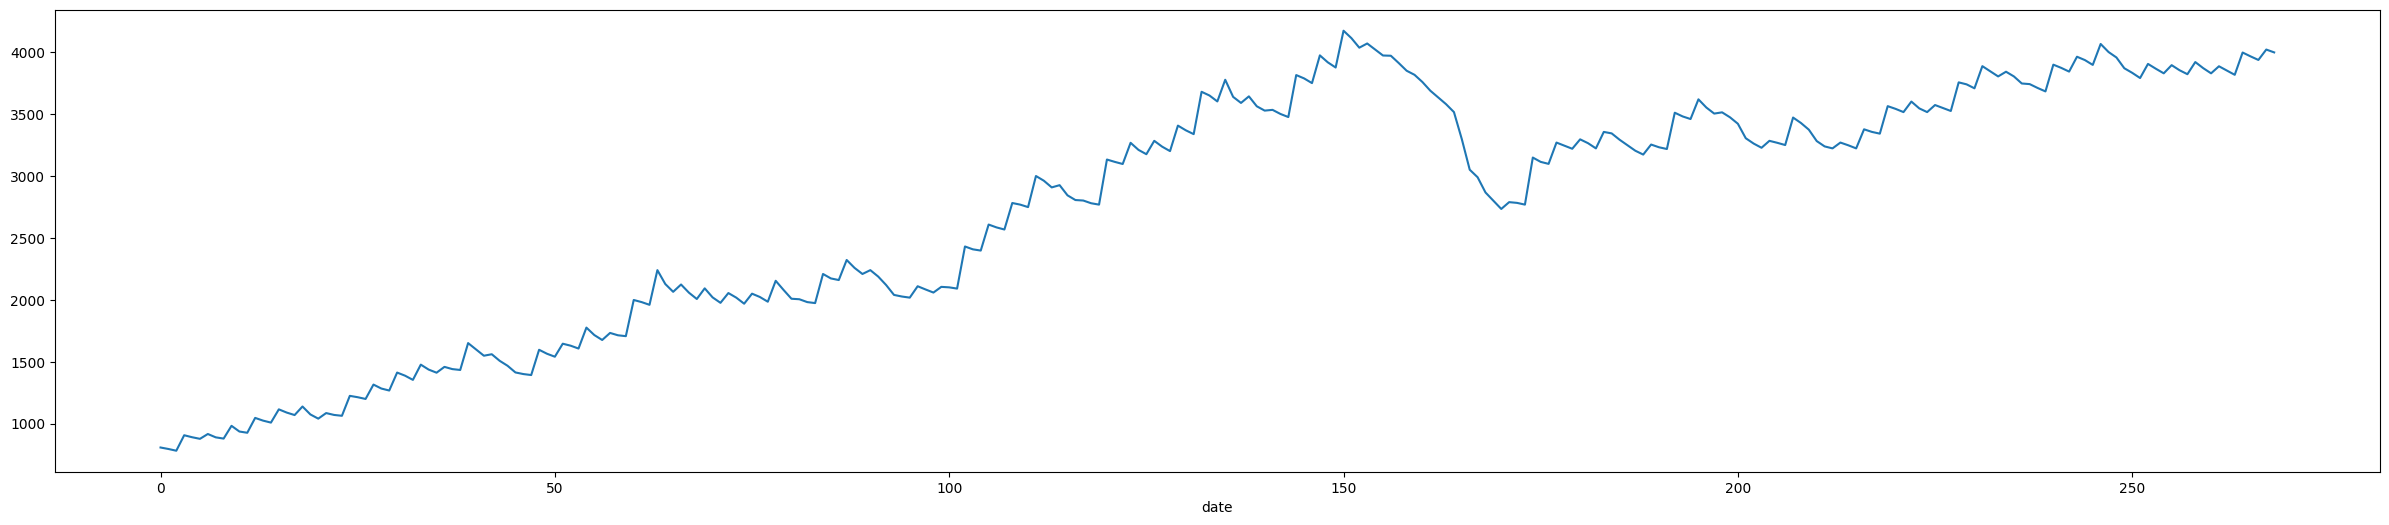

In [11]:
# Number of assets (vehicles) per periods in the universe
X_train.groupby(['date'])['id'].count().plot(figsize=(30, 6));

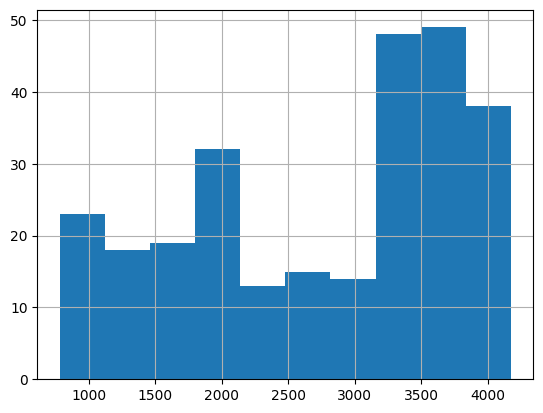

In [12]:
X_train['date'].value_counts().hist();

Which seems enough well-behaved for our purposes.

In [13]:
y_train.nunique()

date       269
id      742670
y       531364
dtype: int64

In [14]:
y_train.head(10)

,date,id,y
0,0,dae29c8061b3176b9208f26afbb96e2ca50886db41902d...,0.192308
1,0,2f71f1b5d49fbd131351df95848dc91ab14662af62d4d0...,-0.476959
2,0,b8d41ef950b69f94c380410f59f47e15666c57b74573b6...,0.080645
3,0,cdce060d04ce28a551eaab653cc4b01f5ad878aeb932ec...,0.953125
4,0,86f6e6d9407ad3abfab91a3bbfb7ad71553e3f968765b8...,-0.979263
5,0,cd75786a46232a23b4e8f3e99b1045d0356426f88683e7...,-0.170330
6,0,9e194bf6a6663e2d71d120e7adcc7bb18416b8d43773ee...,0.578125
7,0,413eb24dbf37909b4023869809f4b0644bebfb376480b1...,0.850230
8,0,87ed8e2b2b32bf2ecddd0fbc723a186ba565dcf218a2fc...,-0.619816
9,0,a6b69417add3ecfb23d061aca5b370e35de6802c90033f...,0.698157


The target variable **y** seems coherent with the problem description, we can investigate it a bit further later on.

Let us check the null value distribution.

In [15]:
np.sum(np.sum((X_train.isna()))) 

0

No missing values to worry about!

We should now plot some of the features and observe them under different smoothing values. We do this in order to visually uncover dominant trends that otherwise may be obscured by noise or high volatility. Notice that by plotting features directly we are not accounting for the dates separation of values. This however still lets us understand global information about the universe. Namely, if features exhibit clear trends, then we may be able to interpret that effect as "universe drift". If universe drift is present, it could be an interesting effect to harness in our predictions.

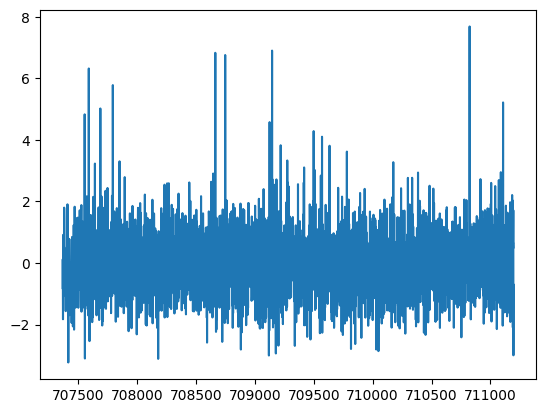

In [16]:
X_train.loc[X_train['date'] == 260, '1'].plot();

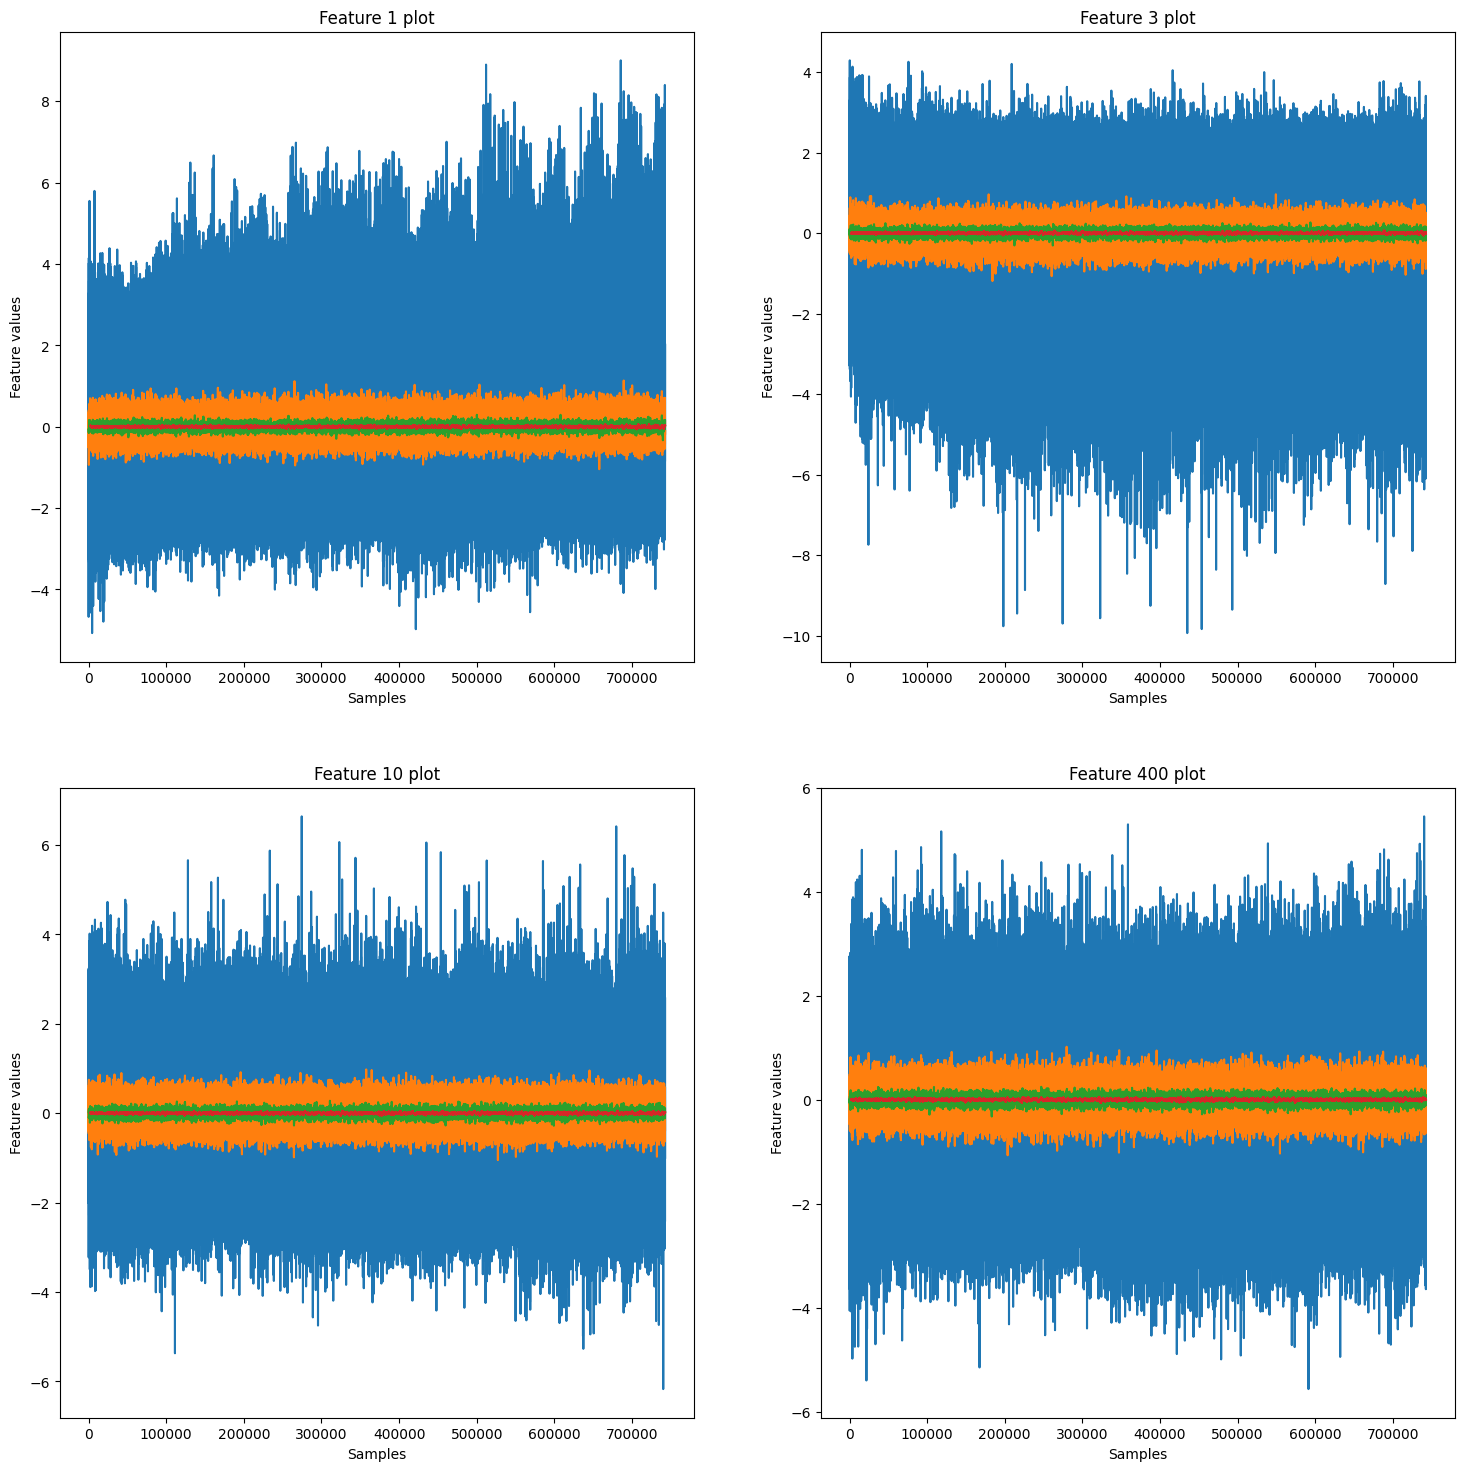

In [17]:
fig, axs = plt.subplots(2, 2, figsize=(18, 18))
feats = ['1', '3', '10', '400']
ax = axs.flatten()

for idx, a in enumerate(ax):
    a.plot(X_train[feats[idx]])
    a.plot(X_train[feats[idx]].rolling(20).mean())
    a.plot(X_train[feats[idx]].rolling(200).mean())
    a.plot(X_train[feats[idx]].rolling(2000).mean())
    a.set_title('Feature ' +  feats[idx] + ' plot')
    a.set(xlabel='Samples', ylabel='Feature values')

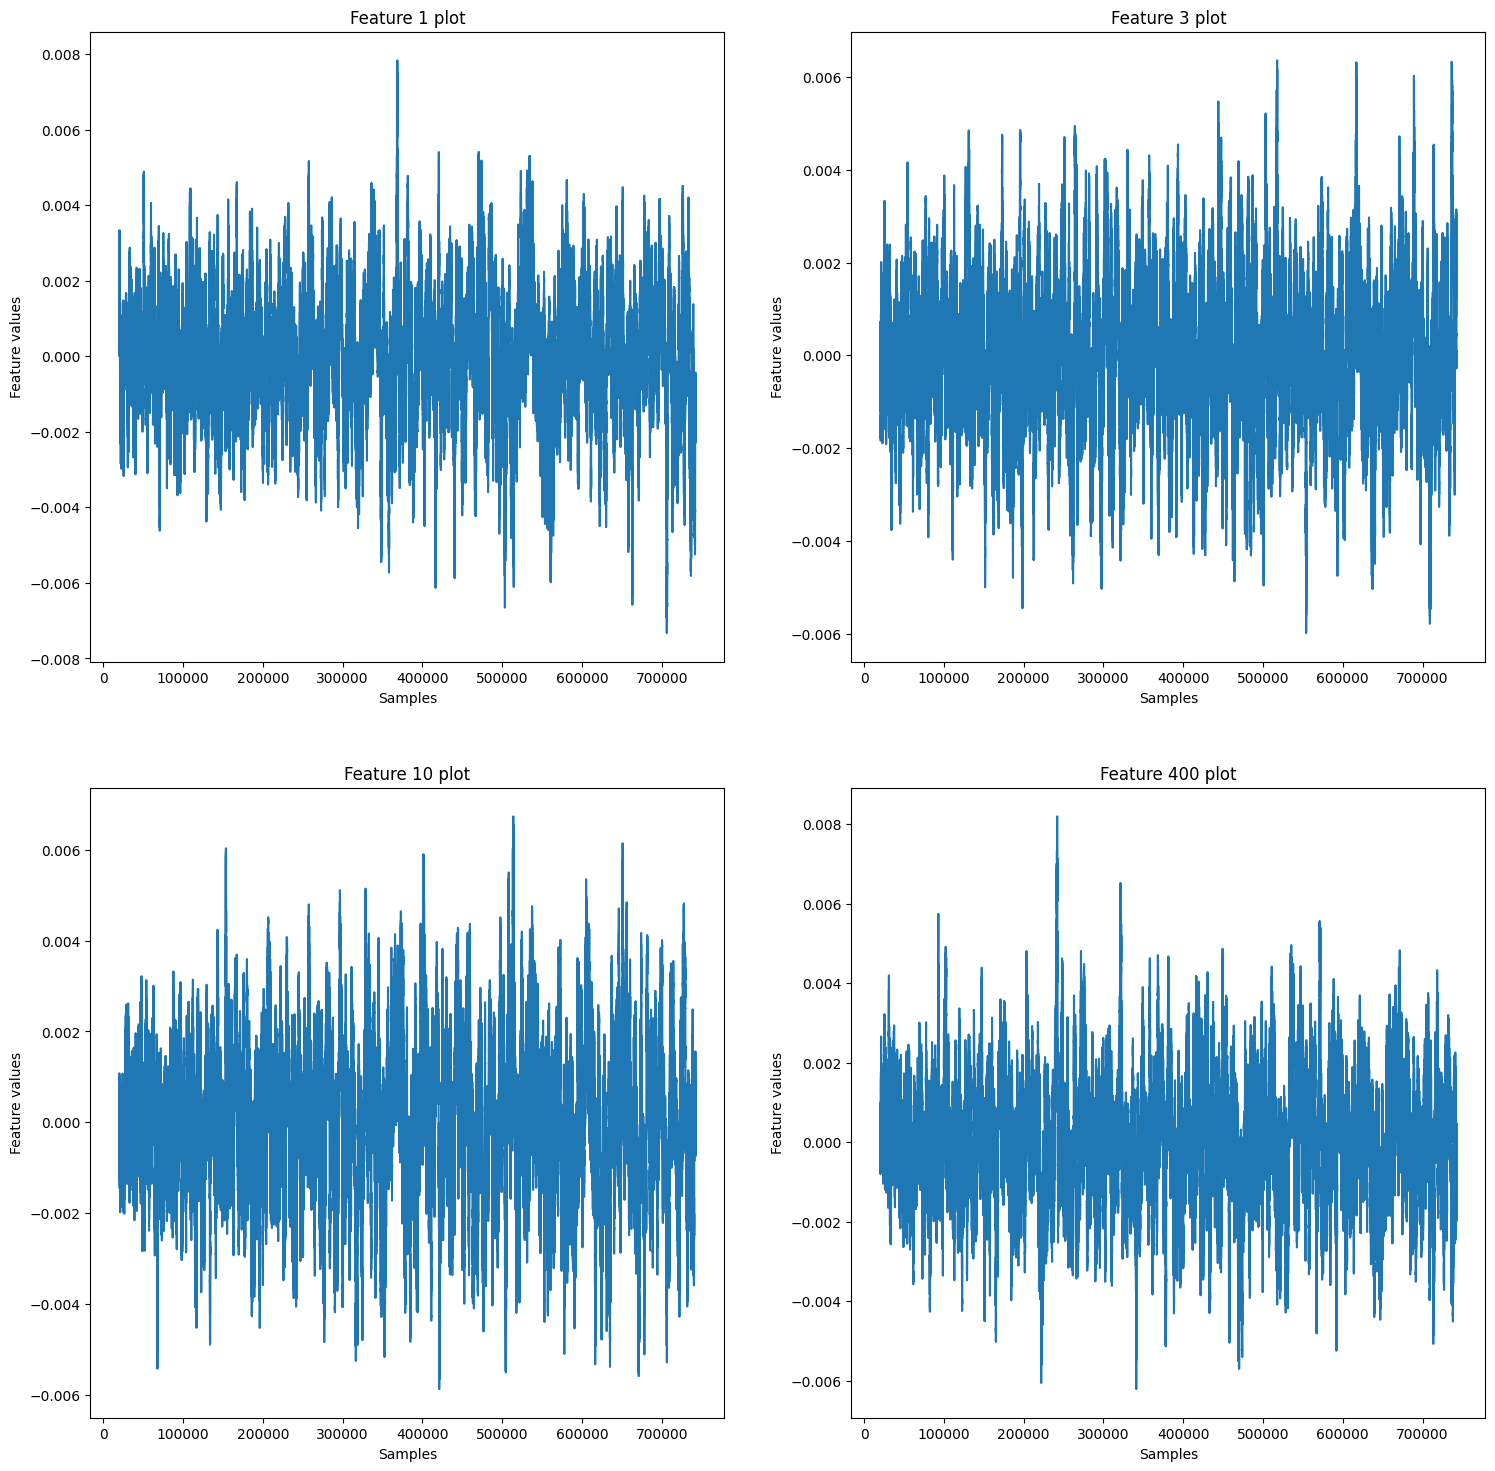

In [18]:
fig, axs = plt.subplots(2, 2, figsize=(18,18))
ax = axs.flatten()
for idx,a in enumerate(ax):
    a.plot(X_train[feats[idx]].rolling(20000).mean())
    a.set(xlabel='Samples', ylabel='Feature values')
    a.set_title('Feature ' +  feats[idx] + ' plot')

Let us now look at it in a per-date basis

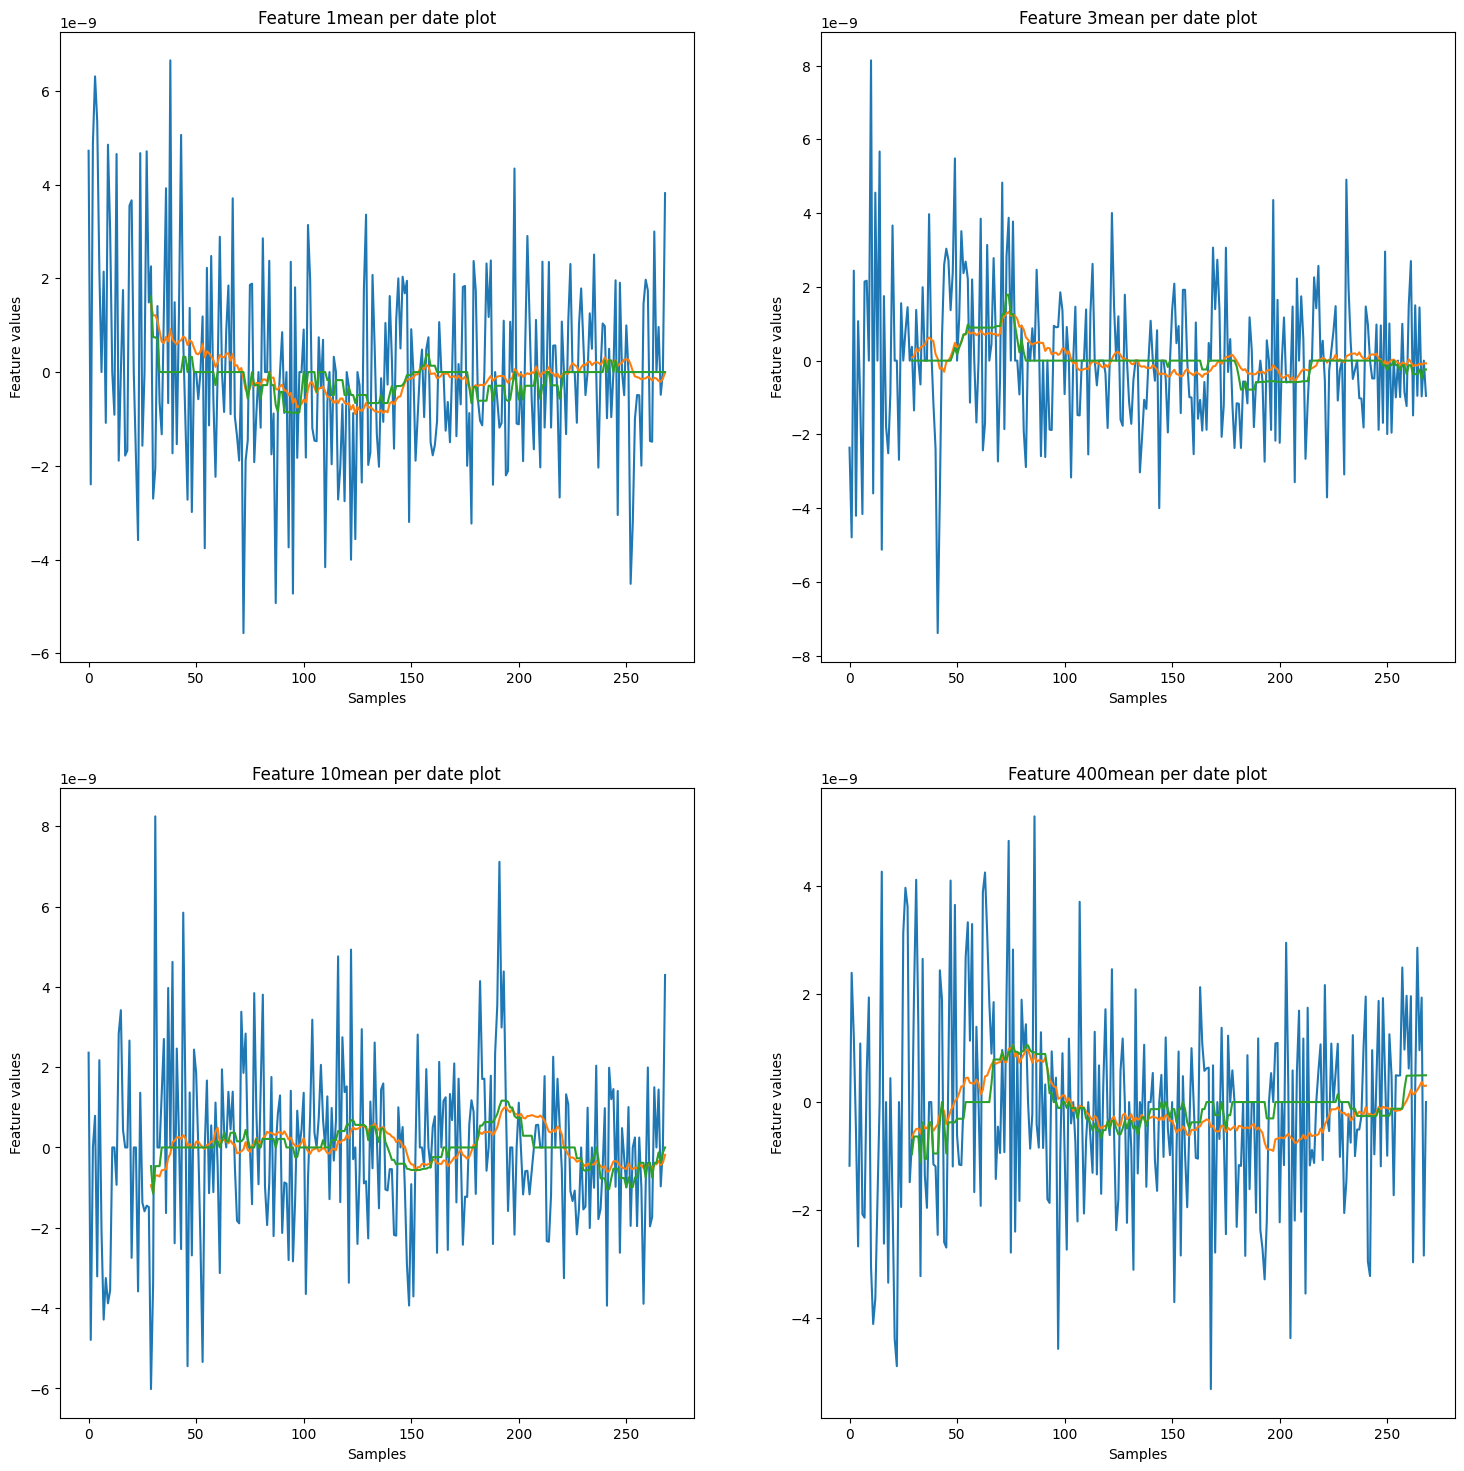

In [19]:
x_means_1, x_means_3, x_means_10, x_means_700 = [], [], [], []
x_means = [x_means_1, x_means_3, x_means_10, x_means_700]

for i in range(max_date):
    x_means_1.append(X_train.loc[X_train['date']==i, '1'].mean())
    x_means_3.append(X_train.loc[X_train['date']==i, '3'].mean())
    x_means_10.append(X_train.loc[X_train['date']==i, '10'].mean())
    x_means_700.append(X_train.loc[X_train['date']==i, '400'].mean())

fig, axs = plt.subplots(2, 2, figsize=(18,18))
ax = axs.flatten()
for idx,a in enumerate(ax):
    a.plot(x_means[idx])
    a.plot(pd.DataFrame(x_means[idx]).rolling(30).mean())
    a.plot(pd.DataFrame(x_means[idx]).rolling(30).median())
    a.set(xlabel='Samples', ylabel='Feature values')
    a.set_title('Feature ' +  feats[idx] + 'mean per date plot')

Features do not exihibit clear trending behaviours. Let us now try to understand how features relate to each other.

In [20]:
import seaborn as sns

In [21]:
gcorr = np.corrcoef(X_train.iloc[:, 2:],rowvar=False) #numpy is much faster that pandas corr() method for large only-numerical data without missing values.

In [22]:
def plot_correlation_heatmap(corr):
    ax = sns.heatmap(
        corr, 
        vmin=-1, 
        vmax=1,
        center=0,
        cmap=sns.diverging_palette(20, 220, n=200),
        square=True,
    )
    ax.set_xticklabels(
        ax.get_xticklabels(),
        rotation=45,
        horizontalalignment='right',
    )

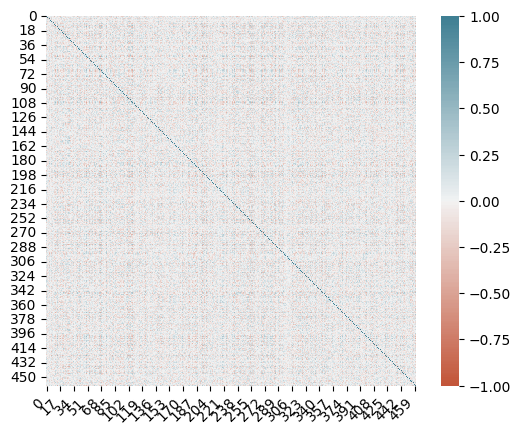

In [23]:
plot_correlation_heatmap(gcorr)

Clearly this is manually untractable, but we will still like to explore at least certain subsets of the variables to try to obtain a representative picture of the situation.

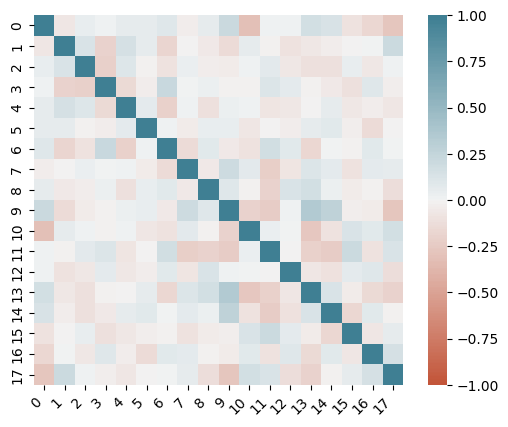

In [24]:
corr = np.corrcoef(X_train.iloc[:, 2:20], rowvar=False)
plot_correlation_heatmap(corr)

Very low correlations in the first variabes, let us consider other cases.

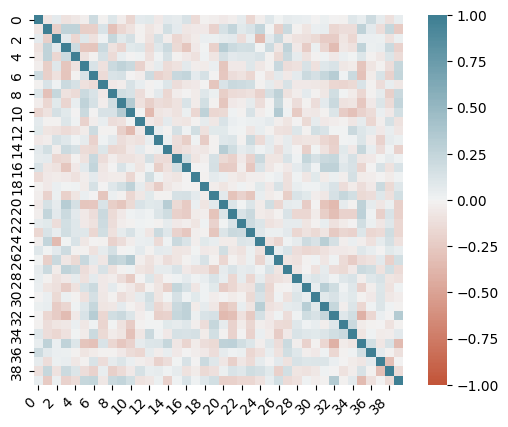

In [25]:
corr = np.corrcoef(X_train.iloc[:, 20:60], rowvar=False)
plot_correlation_heatmap(corr)

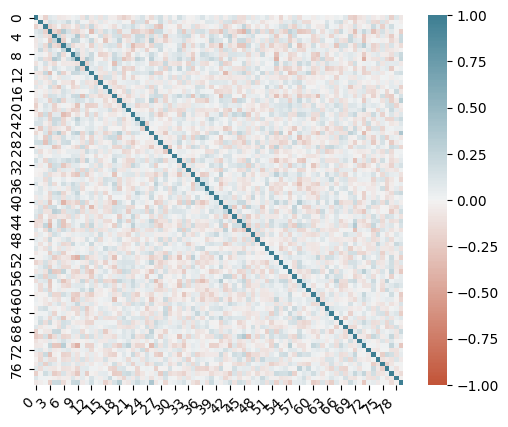

In [26]:
corr = np.corrcoef(X_train.iloc[:, 100:180], rowvar=False)
plot_correlation_heatmap(corr)

Rather than continue with visual inspection, let us resort to numerical exploration. For example, let us see what the strongest available case is of negative correlation.

In [27]:
corr = np.corrcoef(X_train.iloc[:, 2:], rowvar=False)
np.min(corr)

-0.49675897165763205

Let us now see the strongest case of positive correlation, for this we need to look at values that are not corr(X,X) and thus value 1. Checking the ranking of correlations already reveals the maximum value we are looking for.

In [28]:
cs= np.sort(corr.flatten())
cs[-466:-452]

array([0.51118552, 0.51942989, 0.51942989, 0.53139624, 0.53139624,
       1.        , 1.        , 1.        , 1.        , 1.        ,
       1.        , 1.        , 1.        , 1.        ])

The maximum value smaller than one can be deduced to correspond to the first non-trivial correlation comparison between variables (first distinct variables case). Let us check the values in a histogram.

array([[<Axes: title={'center': '0'}>]], dtype=object)

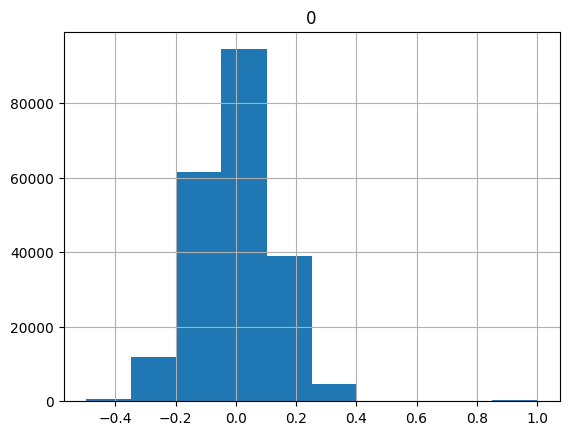

In [29]:
pd.DataFrame(gcorr.flatten()).hist()

Overall, there is a consistent tendecy to show low to at most medium correlation levels in all observed cases. This could ease our concerns about negative properties, such as multicolinearity, dampening the performance of some of our model choices. Let us now consider the frequency by which values or ranges of values occur in each feature.

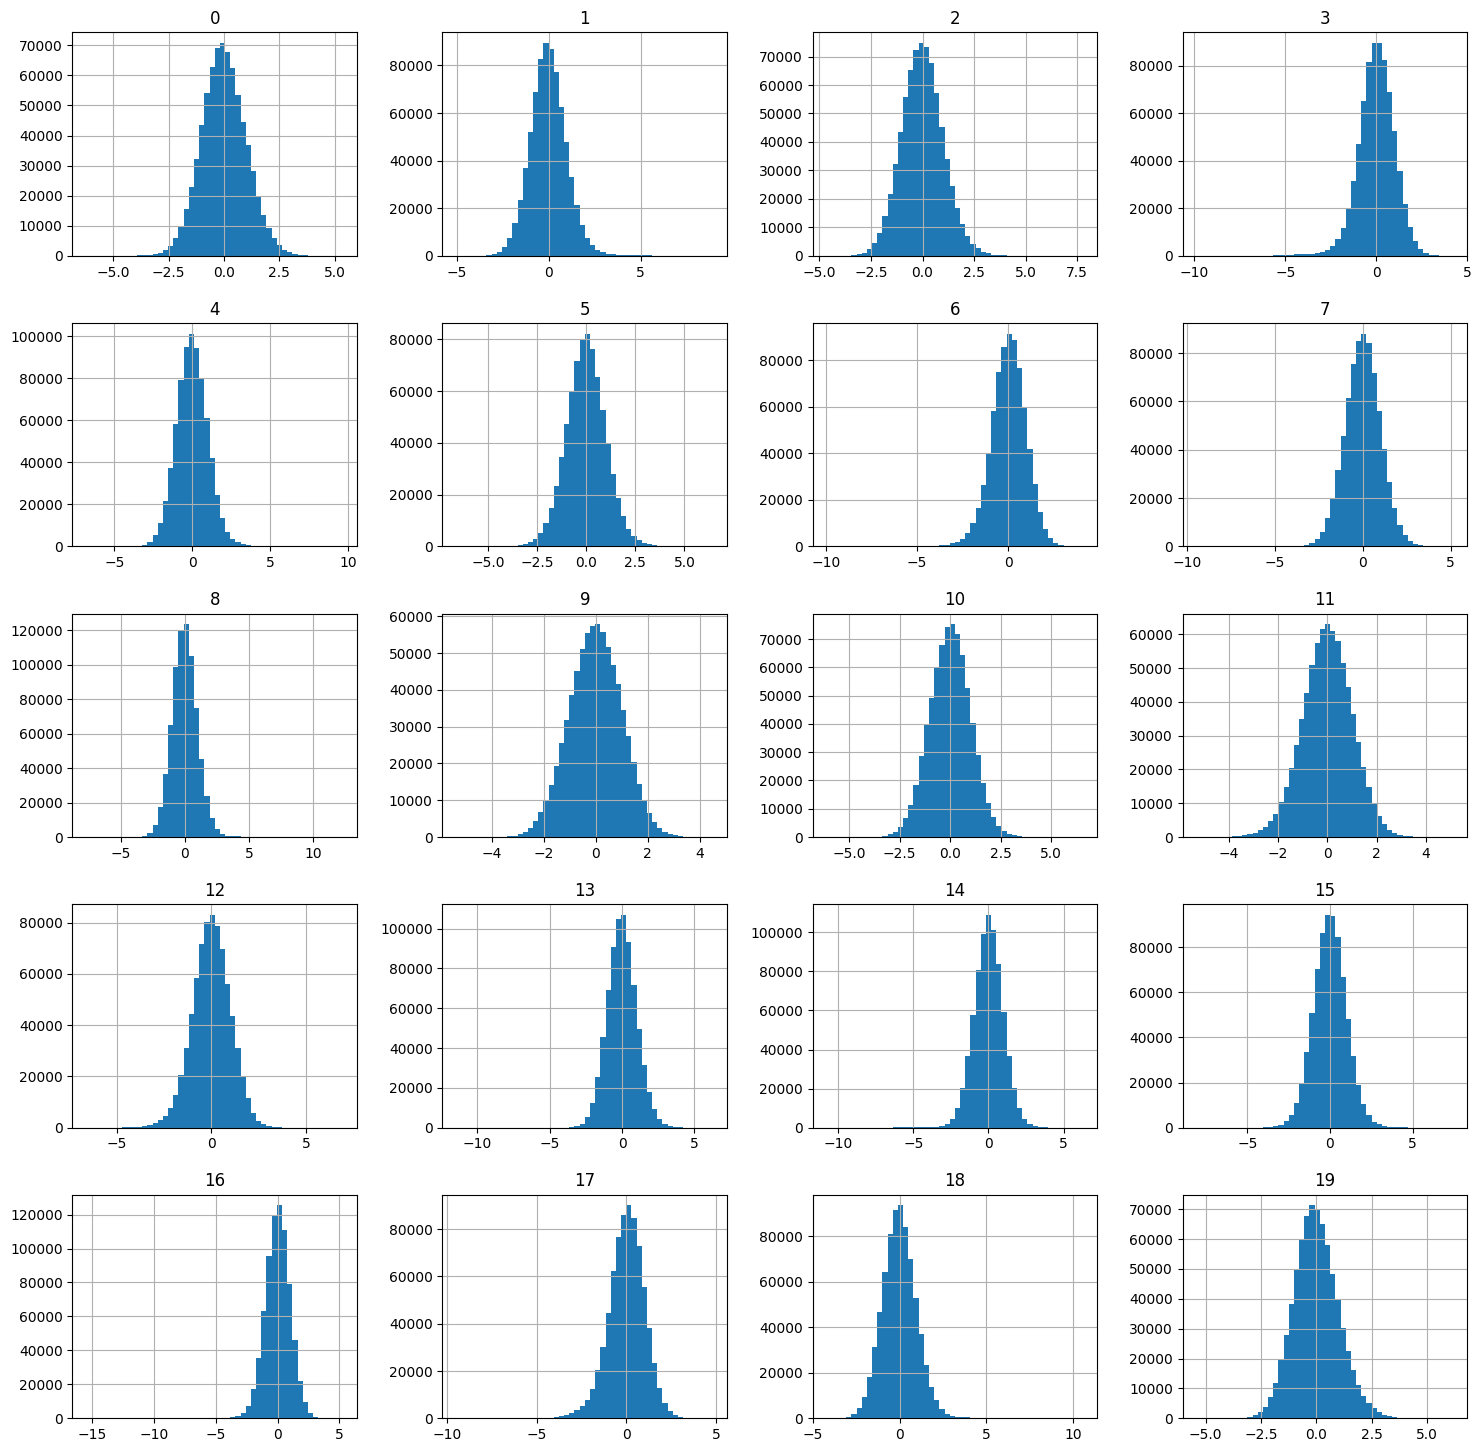

In [30]:
X_train.iloc[:, 2:22].hist(bins=50, figsize=(18, 18))
plt.show()

Visualization by means of histograms sheds light as to where observations really concentrate. Let us continue inspecting a bit further.

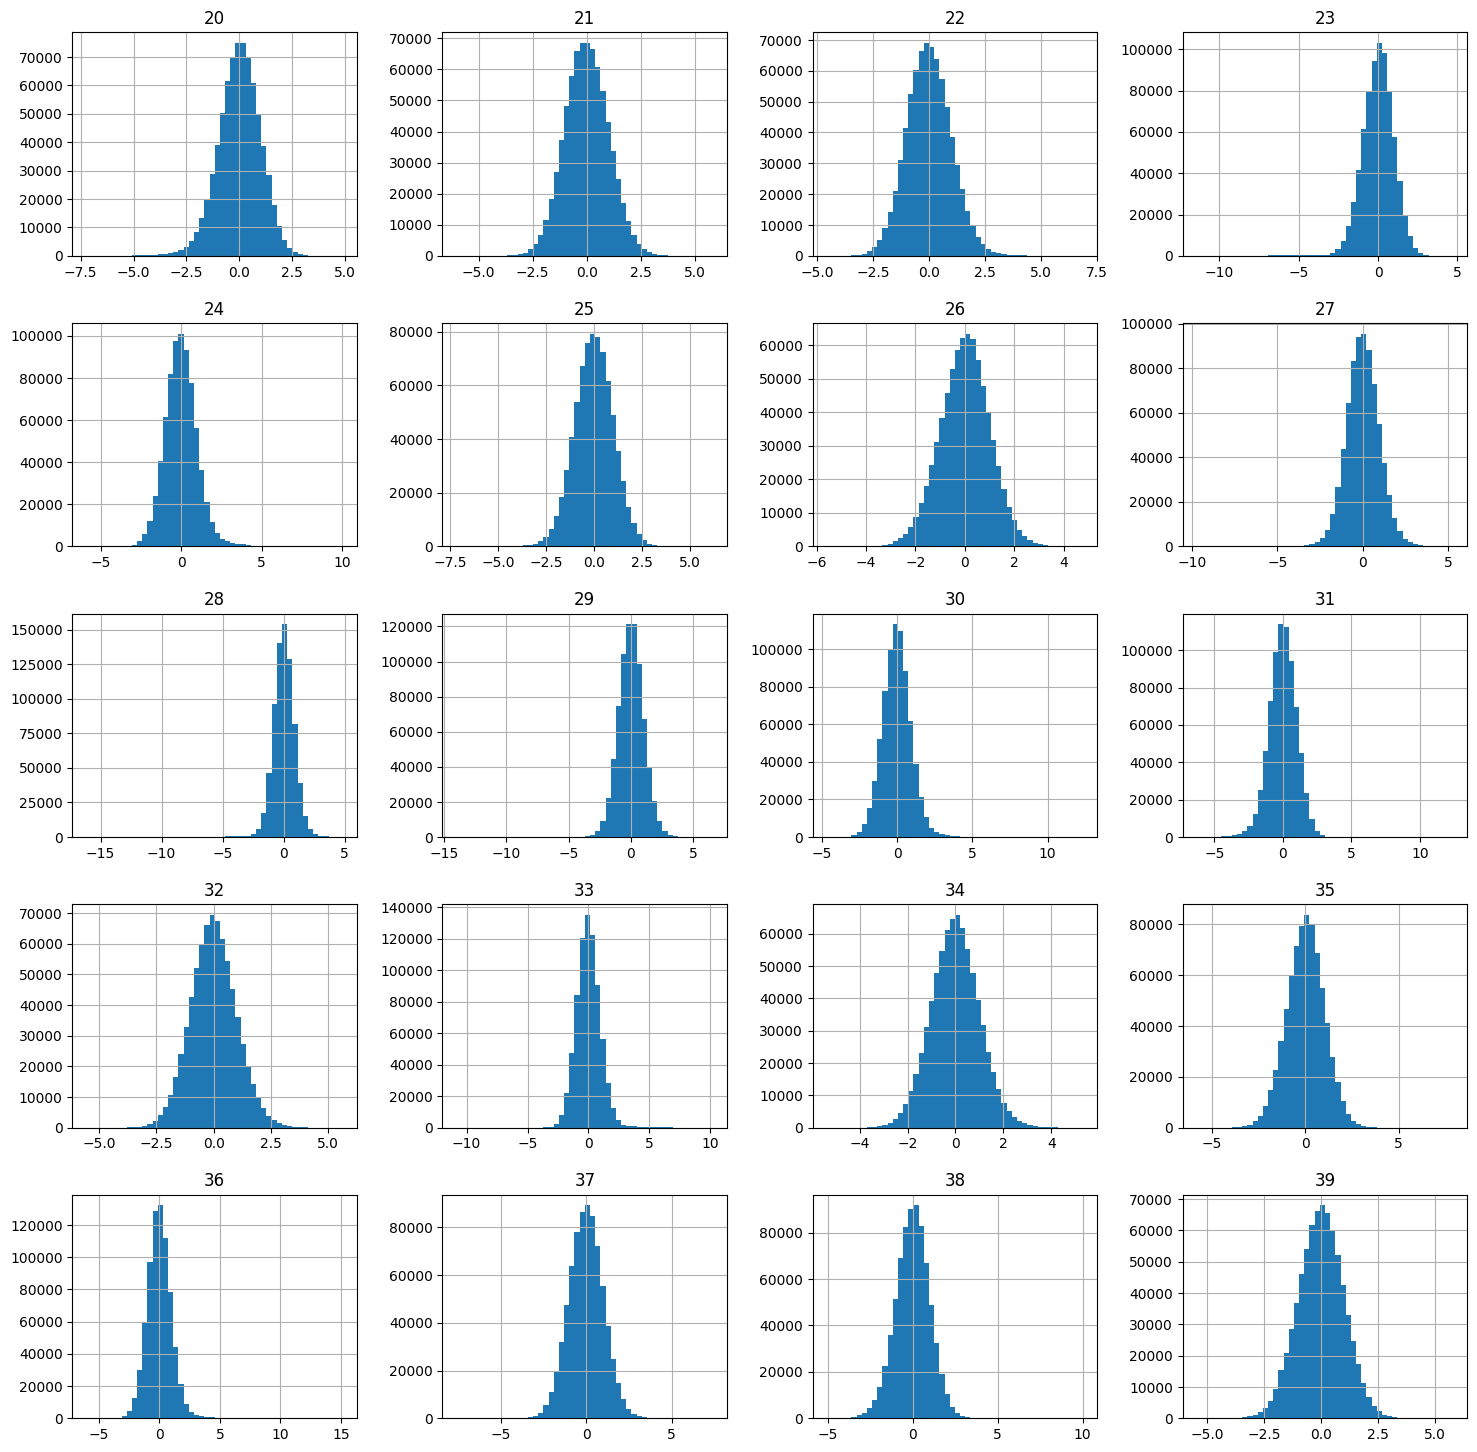

In [31]:
X_train.iloc[:, 22:42].hist(bins=50, figsize=(18, 18))
plt.show()

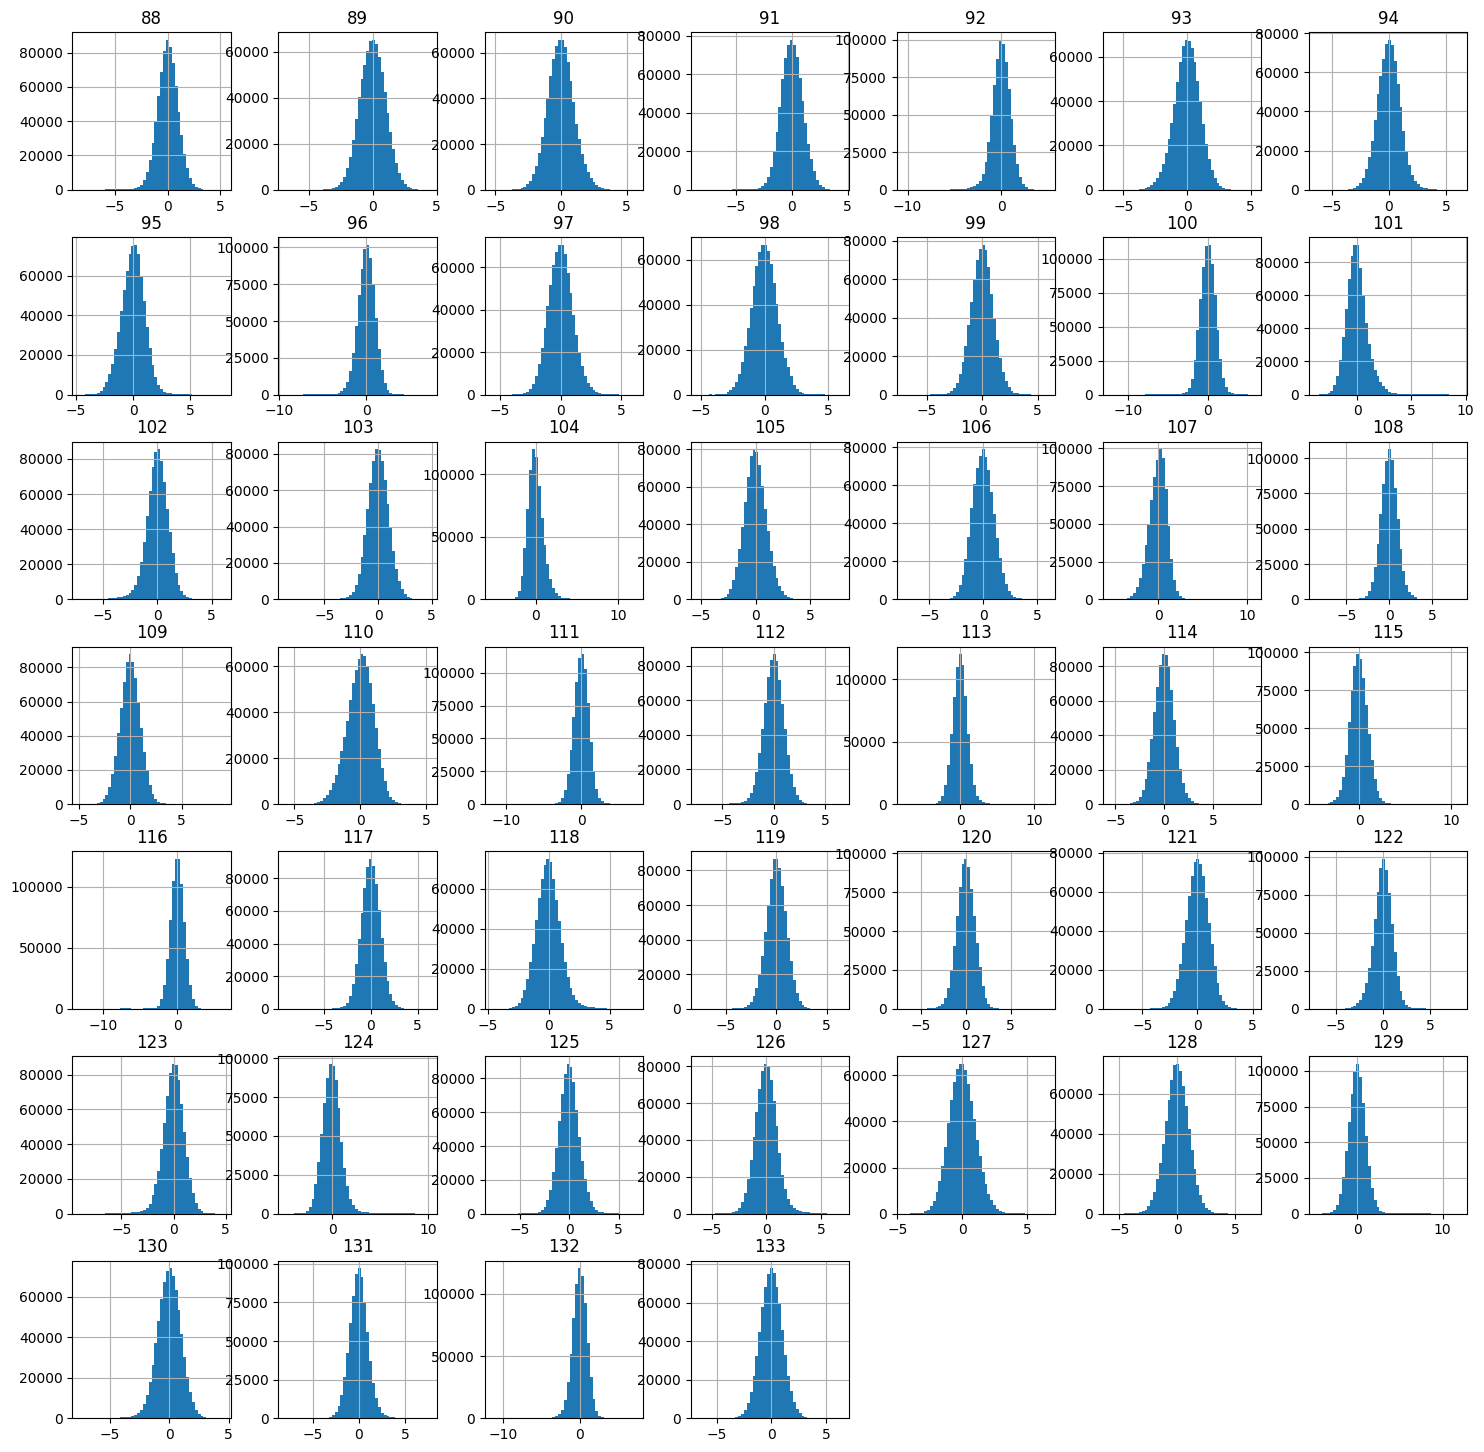

In [32]:
X_train.iloc[:, 90:136].hist(bins=50, figsize=(18, 18))
plt.show()

Features are markedly unimodal, we will test if they conform to normal distributions shortly.

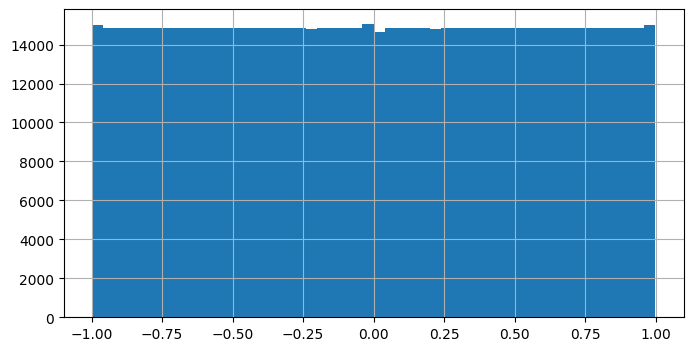

In [33]:
y_train.y.hist(bins=50, figsize=(8, 4))
plt.show()

The target variable, on the other hand, seems uniformly distributed. Let us proceed with the Gaussianity tests.

In [34]:
from statsmodels.graphics.gofplots import qqplot

The qqplot allows one to visually assess the degree of Gaussianity of a feature, by noticing how well the samples of the feature of analysis fit to the red line in the plot. Better fit implies closer to a pure Gaussian distribution.

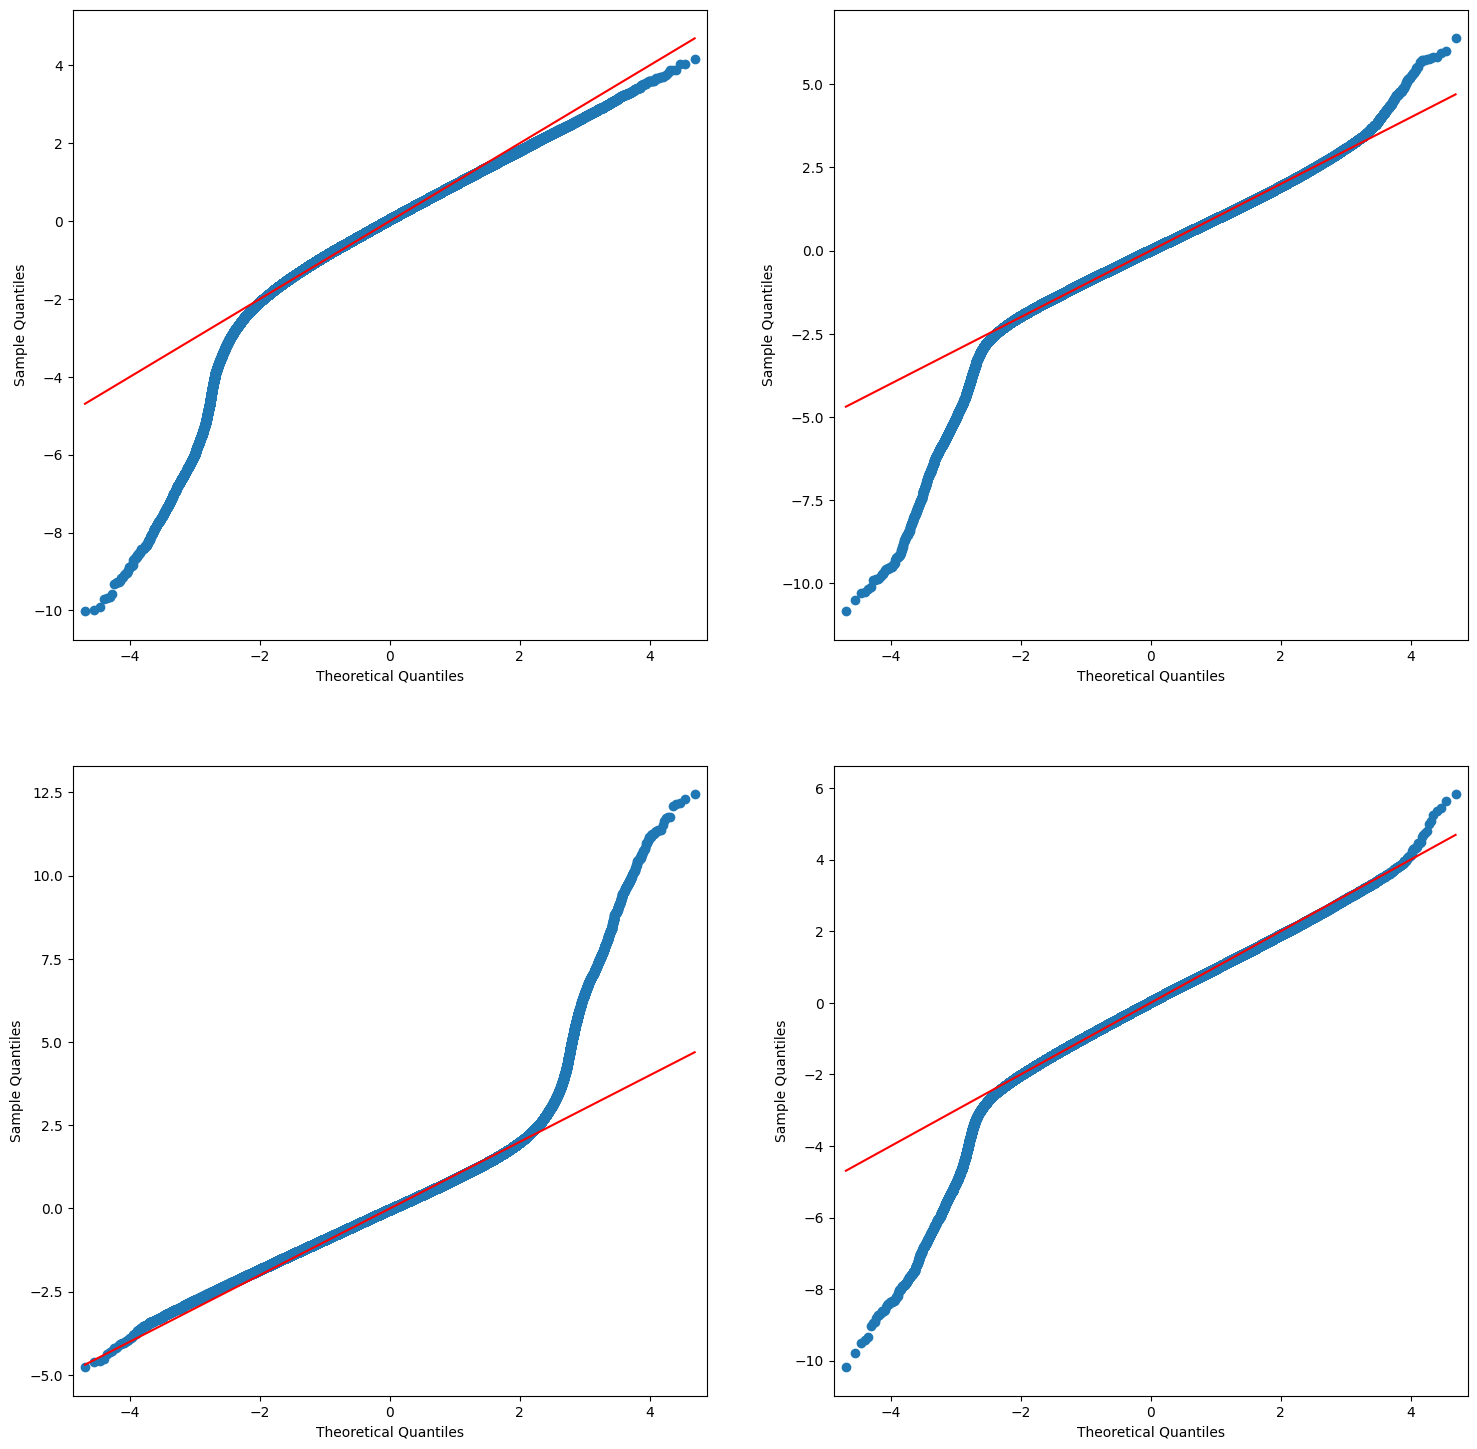

In [35]:
fig, axs = plt.subplots(nrows=2, ncols=2, figsize=(18, 18))
ax = axs.flatten()
feats = [8, 16, 32, 64] # We explore a different set of features
for idx,a in enumerate(ax):
    qqplot(X_train.iloc[:, feats[idx]], line='s', ax=a)
plt.show()


We can test it more formally using hypothesis tests for Gaussianity.

In [36]:
from scipy.stats import shapiro

In [37]:
p_vals_shapiro = []
for i in range(2, max_feats):
    stat, p = shapiro(X_train.iloc[:, i])
    p_vals_shapiro.append(p)
sum(np.array(p_vals_shapiro) >= 0.05)

2

Two features are clearly Gaussian with a p-value of 1, indicating that the Shapiro test reports certainty of Gaussianity even in the presence of a high number of samples for a univariate test.

In [39]:
from scipy.stats import normaltest
p_vals_DAgostinok2 = [] 
for i in range(2, max_feats):
    stat, p = normaltest(X_train.iloc[:, i])
    p_vals_DAgostinok2.append(p)
sum(np.array(p_vals_DAgostinok2) >= 0.05)

2

Similarly, two features pass the gaussianity test this time.

In [40]:
from scipy.stats import anderson
p_vals_anderson = [] 
for i in range(2, max_feats):
    result = anderson(X_train.iloc[:, i], dist='norm')
    fail = False
    for i in range(len(result.critical_values)):
        sl, cv = result.significance_level[i], result.critical_values[i]
        if result.statistic >= result.critical_values[i]:
            p_vals_anderson.append(0)
            fail = True
            break
    if not fail:
        p_vals_anderson.append(1)
sum(np.array(p_vals_anderson) >= 0.05)

0

And according to this test, none.

Our Gaussianity  and previous trend analyses are likely just covering a design choice in the transformation of the variables, prior to the presentation of this data to the competition. This makes our data more amenable to certain modelling choices, and does not necessarily affect the interrelations between values of different features (not to a point where our models are prevented from finding good solutions due to this change). Expanding on the usefulness of these discoveries is left as an extended exercise for the competitor.

Common visualization tools in time series analysis are the autocorrelation and partial autocorrelation plots. The rationale for its use resides in potentially leveraging the effect that previous
values may introduce in future values. However, in our case, this is not directly applicable as we are not given a time series. Something like adding features that are lagged values to our table will not work for this purpose. It is interesting, however, to consider summary statistics applied to the data at each date, and build a table that reflects exclusively information about the universe at a given date. For example and as a very simple formulation, one could compute the mean value of each feature at a given date, and build a new table that contains those values for a single date. This table is therefore comprised of as many rows as different dates are available in our data, and it is now directly compatible with a time series framework, where lagged effects can be used directly. 


In [41]:
from statsmodels.graphics.tsaplots import plot_acf
from statsmodels.graphics.tsaplots import plot_pacf

In our case, we will build a table on the standard deviation, and check the autocorrelation

In [42]:
#df_global = X_train.groupby('date').mean()
df_global = X_train.groupby('date').std()

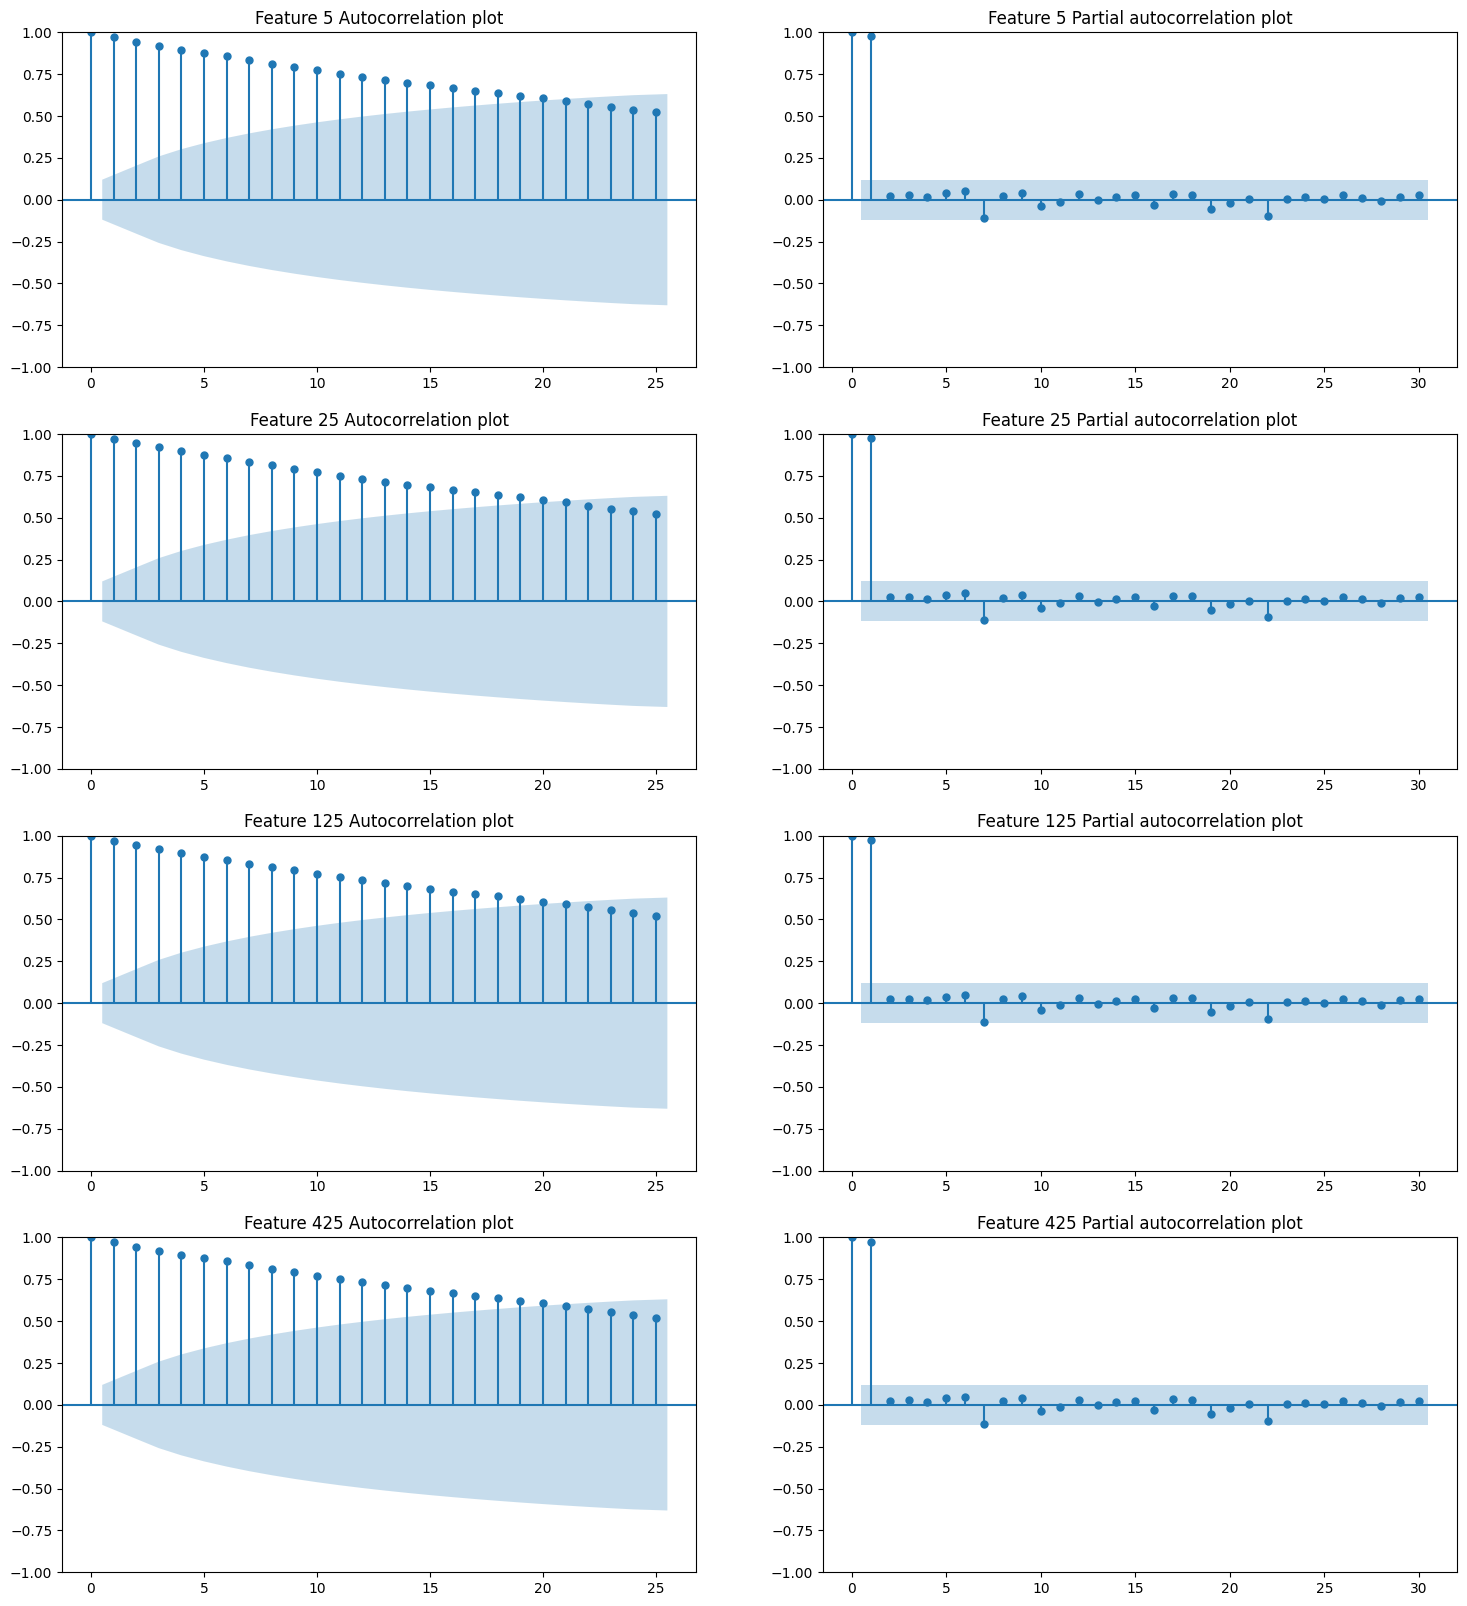

In [43]:
fig, axs = plt.subplots(nrows=4, ncols=2, figsize=(18, 20))
ax = axs.flatten()
feats = ['5', '25', '125', '425']
for i in range(4):
    a1 = ax[2*i]
    a2 =  ax[2*i+1]
    plot_acf(df_global[feats[i]], ax=a1)
    plot_pacf(df_global[feats[i]], lags=30, ax=a2) 
    a1.set_title('Feature ' +  feats[i] + ' Autocorrelation plot')
    a2.set_title('Feature ' +  feats[i] + ' Partial autocorrelation plot')
plt.show()

In all explored cases, results indicate the potential detection of linear effects at 1 lag in the partial autocorrelation plot, and what appears to be the same effect dissipating through increasing lags in the autocorrelation plot.  

In order to incorporate this data into a final submission, what needs to be done with the target variable, and what use would this data have are interesting and neccesary follow-up questions. This idea is mentioned up to this point but not explored in more detail in this notebook. It can be left as an exercise to the competitor and a possible direction to a final submission. We will however show, for the purposes of this discussion, the result of the autocorrelation and partial autocorrelation plots rawly applied to one feature of this data. 

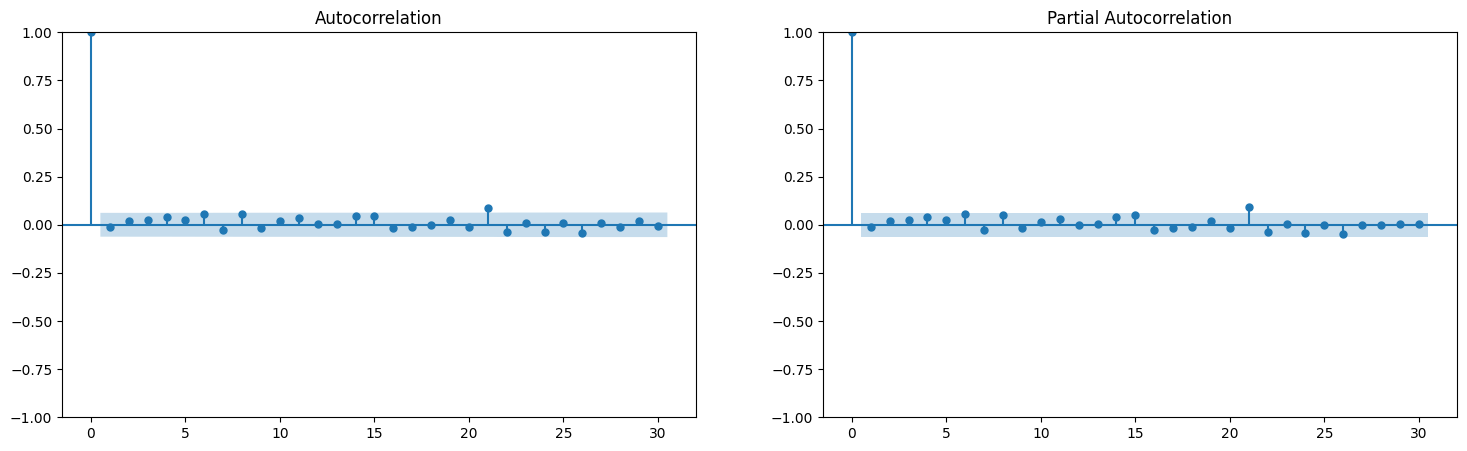

In [44]:
fig, axs = plt.subplots(nrows=1, ncols=2, figsize=(18, 5))
ax = axs.flatten()
plot_acf(X_train.iloc[0:1000, 3],ax=ax[0])
plot_pacf(X_train.iloc[0:1000, 3], lags=30, ax=ax[1])
plt.show()

Results indicate no effects, and are consistent across all other features for which we have performed the test, as expected.

### Feature engineering

Our approach in this notebook will be centered around providing each row with information about the universe at the same date and the position of the sample within that universe. 
This will potentially enable our models to interpret the values obtained in the original features with respect to the values of the universe at that date (and how they relate to the final ranking).

Our objective is therefore to capture group-emergent properties that hopefully contain predictive power for our purposes.

We will add the following features:
1. **Centroid_distance**: We will compute the center point of the whole group (the mean of each feature separatedly conforms the centroid coordinate) and then obtain some l_p metric values, between the center and the sample at each row, for different values of l, namely 1, 2 and infinity. The hope is to capture any predictive power that the position of a sample, relative to all others in the "cloud of points" that conforms each date, offers. This will create the final features  **centroid_l1, centroid_l2** and **centroid_linf**.
4. **Sum_ranks**: For each feature, compute its ranking from lowest to highest in the whole group, per date, sum all the newly computed rankings
5. **Sum_values**: For each point, sum all the original values

Let us begin by dropping the id feature

In [45]:
X_train = X_train.drop('id', axis=1)
y_train = y_train.drop('id', axis=1)
max_feats-=1

And now introduce a method that directly adds the aforementioned features to our dataset. 

In [46]:
def calc_dist(l_norm, p1, p2): # A simple but general l_p distance method between 2 points of arbitraty dimension
    if l_norm == 0: # In here we use 0 to represent inf
        return np.max(np.abs(np.array(p1) - np.array(p2)))
    else:
        return np.float_power(sum(np.abs(np.power(np.array(p1) - np.array(p2), l_norm))), 1/l_norm)

def compute_features_of_interest_local(data): #This is per date, will be called once per existing date
    n, d = data.shape        
    feats = list(data.columns)[1:]    
    centroid = []
    sds = []
    data.loc[:, 'sum_rank'] = 0
    data.loc[:, 'sum_vals'] = 0
    for feat in feats:
        df = data[feat]
        dfs = np.array(sorted(enumerate(df), key= lambda x: x[1], reverse=True))[:,0] #rankings of each feature w.r.t the others (low rank higher score) 
        data.loc[:, 'sum_rank'] = dfs + data.loc[:, 'sum_rank']     
        centroid.append(df.mean())
    data.loc[:, 'centroid_l2'] = data.loc[:, feats].apply(lambda x: calc_dist(2, centroid, x), axis=1)
    data.loc[:, 'centroid_l1'] = data.loc[:, feats].apply(lambda x: calc_dist(1, centroid, x), axis=1)
    data.loc[:, 'centroid_linf'] = data.loc[:, feats].apply(lambda x: calc_dist(0, centroid, x), axis=1)
    data.loc[:, 'sum_vals'] = data.apply(lambda x: sum(x[1:max_feats]), axis=1) #We quickly can add another feature to summarize the overall ranking
    return data

Notice that our previous method needs to be called for each date in order to produce the relative rankings correctly, as well as the other features, we follow up with this

In [47]:
X_train_ex = [] #Saves the result of the expanded data at every date
for date in tqdm(range(max_date)):
    X_train_ex.append(compute_features_of_interest_local(X_train.loc[X_train['date']==date, :]))

  0%|          | 0/269 [00:00<?, ?it/s]

100%|██████████| 269/269 [12:23<00:00,  2.76s/it]


...and merge the results into a processed dataset

In [48]:
X_train_2 = pd.concat(X_train_ex) 

In [49]:
X_train_2.memory_usage(index=True, deep=True).sum() / 1024**2 # It occupies roughly 1.3 Gb

1342.8710174560547

### Modelization 

We will move our efforts now towards modelization, in this notebook, we will consider 2 approaches:
1. Plain regression on the whole dataset
2. Plan regression on a windowed dataset

Let us proceed with both. 


We start by choosing our validation scheme. We will use temporal cross validation to test the generalization capabilities of our models.






In [50]:
from sklearn.model_selection import TimeSeriesSplit

As we have discussed, our dataset is not conventionally arranged as a time series, since we have multiple measures per date, and the feature "date" acts as our "clock", rather than a prespecified order that sorts samples in time. If we were to divide the dataset in contiguous chunks of data, we would be mixing data from different dates. This is undesirable for our purposes and thus, in order to construct a proper temporal cross validation, the splits need to occur on different dates.

We should also concern ourselves with the target loss of our problem (IC or Spearman's rank correlation). All of it will be implemented below.

In [51]:
from typing import List, Dict, Tuple

In [52]:
def TemporalCV(
    List_models: List = None,
    X_data: pd.DataFrame = None,
    y_data: pd.DataFrame = None,
    n_splits: int = 5,
    max_train_size: int = None,
    test_size:int = None
) -> Dict:
    
    max_date = np.max(X_data['date']) + 1
    X = np.array(list(range(max_date))) # Now this is dates, which is where we make the splits, instead of using rows directly
    tscv = TimeSeriesSplit(n_splits=n_splits, max_train_size=max_train_size, test_size=test_size) 
    stats_CV = {} # Storage of performance 
    count = 0
    for train, test in tscv.split(X):
        
        # Purging
        fold_train_X = X_data.loc[np.logical_and(X_data['date'] >= train[0], X_data['date'] < train[-1]), :]
        fold_train_y = y_data.loc[np.logical_and(y_data['date'] >= train[0], y_data['date'] < train[-1]), :]

        # No purging
        fold_test_X = X_data.loc[np.logical_and(X_data['date'] >= test[0], X_data['date'] <= test[-1]), :]
        fold_test_y = y_data.loc[np.logical_and(y_data['date'] >= test[0], y_data['date'] <= test[-1]), :]
        
        count += 1
        sample_pred = fold_test_y.copy()
        for model in List_models:
            model_name = model.__class__.__name__            
            model.fit(fold_train_X, fold_train_y.loc[:, ['y']])  
            preds = model.predict(fold_test_X)
            sample_pred.loc[:, 'y'] = preds.astype(float) 
            score = get_rank_corr_score(sample_pred, fold_test_y)            
            if model_name in stats_CV:
                stats_CV[model_name].append(score)
            else:
                stats_CV[model_name] = [score]
    return stats_CV

def get_rank_corr_score(
    y_preds: pd.DataFrame = None,
    y_trues: pd.DataFrame = None,
) -> float:
    
    rank_pred = y_preds.groupby('date', group_keys=True).apply(lambda x: x.rank(pct=True, method='first'))    
    correlation_score = np.corrcoef(rank_pred['y'], y_trues['y'])[0, 1]
    return correlation_score

For our choice of models, previous analysis seem to paint a good picture with regards to the use of linear models (high volatility, weakly correlated features). We will test
their performance under different Temporal CV arrangements

In [53]:
import sklearn.linear_model

In [54]:
List_models = [
    sklearn.linear_model.LinearRegression(),
    sklearn.linear_model.Lasso(alpha=0.001),
    sklearn.linear_model.ElasticNet(alpha=0.6,l1_ratio=0.001),    
    sklearn.linear_model.Ridge(alpha=0.6) 
] 

Our LinearRegression model obtained an average score of 0.0443 in our CV scheme, with a standard deviation of 0.0124
Our Lasso model obtained an average score of 0.0463 in our CV scheme, with a standard deviation of 0.0108
Our ElasticNet model obtained an average score of 0.0465 in our CV scheme, with a standard deviation of 0.0109
Our Ridge model obtained an average score of 0.0443 in our CV scheme, with a standard deviation of 0.0124


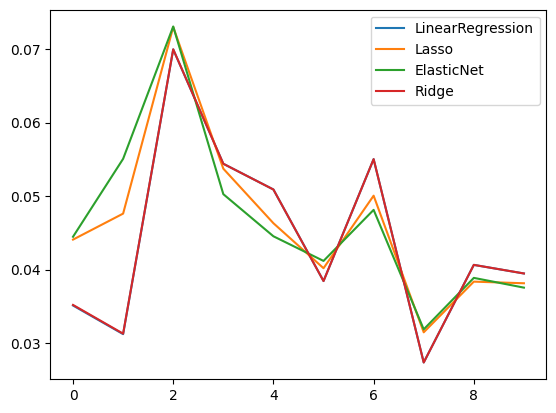

In [55]:
statsCV = TemporalCV(List_models=List_models, X_data=X_train_2, y_data = y_train, n_splits=10)
for key, item in statsCV.items():
    plt.plot(item)
    print('Our ' + key + ' model obtained an average score of ' + str(np.round(np.mean(item), 4)) + ' in our CV scheme, with a standard deviation of ' + str(np.round(np.std(item), 4)))
plt.legend(statsCV.keys())

In this setting, ElasticNet emerged as a winner with a performance slightly above the other models. Parameters for Ridge, Lasso and ElasticNet were chosen after a small hyperparameter search where we attempted different values and obtained the temporal CV performance for each model. Besides the ranking of the models, it can also be noticed that the last evaluations have a tendency towards worse performance. This, in a expanding window, corresponds to the cases where the highest amount of training data was used, which additionally motivates the subsequent study, where performance using a sliding window is evaluated.



But first, let us now quickly assess if our feature engineering efforts had any effect on the overall score

Our LinearRegression model obtained an average score of 0.0441 in our CV scheme, with a standard deviation of 0.0123
Our Lasso model obtained an average score of 0.0459 in our CV scheme, with a standard deviation of 0.0111
Our ElasticNet model obtained an average score of 0.0463 in our CV scheme, with a standard deviation of 0.0112
Our Ridge model obtained an average score of 0.0441 in our CV scheme, with a standard deviation of 0.0123


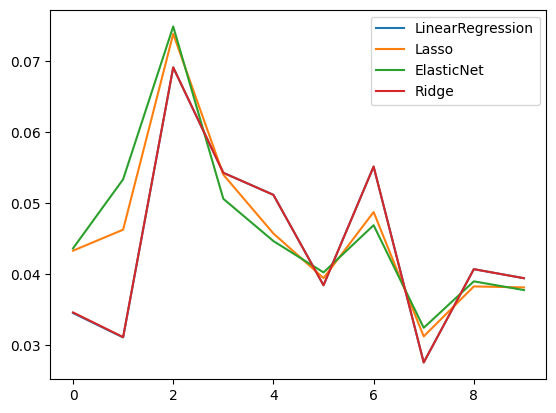

In [56]:
statsCV0 = TemporalCV(List_models=List_models, X_data=X_train_2.iloc[:, 0:max_feats], y_data=y_train, n_splits=10)
for key, item in statsCV0.items():
    plt.plot(item)
    print('Our ' + key + ' model obtained an average score of ' + str(np.round(np.mean(item), 4)) + ' in our CV scheme, with a standard deviation of ' + str(np.round(np.std(item), 4)))
plt.legend(statsCV0.keys())   

In this case, our features do not seem to increase the score. In our experiments with different subsets of the data, however, this set of features showed mostly a slightly positive yet non-robust influence on the final score. Let us now explore what happens if we include only our engineered features and regress on that.

Our LinearRegression model obtained an average score of 0.013 in our CV scheme, with a standard deviation of 0.0085
Our Lasso model obtained an average score of 0.0127 in our CV scheme, with a standard deviation of 0.0083
Our ElasticNet model obtained an average score of 0.0126 in our CV scheme, with a standard deviation of 0.0083
Our Ridge model obtained an average score of 0.013 in our CV scheme, with a standard deviation of 0.0085


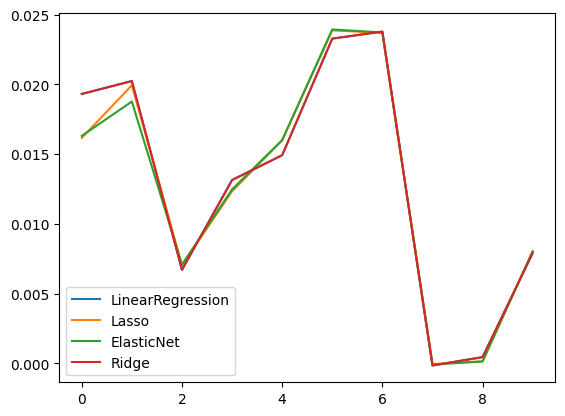

In [57]:
statsCV1 = TemporalCV(List_models=List_models, X_data=X_train_2.drop(X_train_2.columns[1:max_feats], axis=1), y_data=y_train, n_splits=10)
for key, item in statsCV1.items():
    plt.plot(item)
    print('Our ' + key + ' model obtained an average score of ' + str(np.round(np.mean(item), 4)) + ' in our CV scheme, with a standard deviation of ' + str(np.round(np.std(item), 4)))
plt.legend(statsCV1.keys()) 

It seems that predictions have consistently become much worse without the original features, yet these results/this result may suggest that the newly added features capture some of the target signal. Also interestingly, it seems like the Linear regression model is now outperforming all others.

Let us now consider a sliding window approach, we perform the validation while training on a window of 10 dates. If enough information about the state of the problem is contained in just few previous steps, and if information from distant past did not contribute to current prediction due to drift, then this approach would be positively rewarded with respect to the previous one. Suscribing to the notion that distant past observations may be harmful for future predictions should translate, if we choose to proceed this way, into bounding both the training and test sizes (or at least in the awareness of potential performance losses in big test sizes). The reason is that if such property were to be true, then for distant future predictions, our training data will be considered distant past, and therefore already assumed to be subpar. We will see what happens.

Our LinearRegression model obtained an average score of 0.012 in our CV scheme, with a standard deviation of 0.0218
Our Lasso model obtained an average score of 0.0132 in our CV scheme, with a standard deviation of 0.0259
Our ElasticNet model obtained an average score of 0.0123 in our CV scheme, with a standard deviation of 0.0284
Our Ridge model obtained an average score of 0.0122 in our CV scheme, with a standard deviation of 0.0223


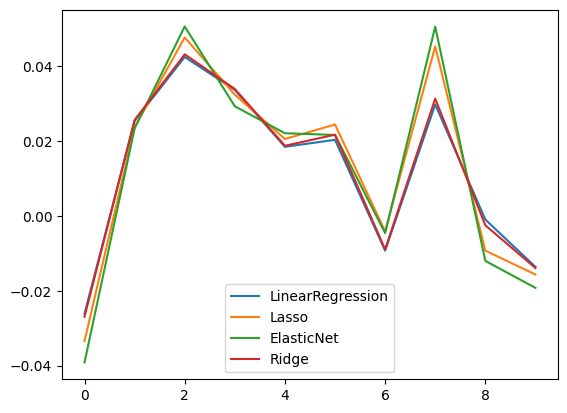

In [58]:
statsCV2 = TemporalCV(List_models=List_models, X_data=X_train_2, y_data=y_train, n_splits=10, max_train_size=10, test_size=10)
for key, item in statsCV2.items():
    plt.plot(item)
    print('Our ' + key + ' model obtained an average score of ' + str(np.round(np.mean(item), 4)) + ' in our CV scheme, with a standard deviation of ' + str(np.round(np.std(item), 4)))
plt.legend(statsCV2.keys())

Clearly, performance seems to have suffered a drop in all cases. 
In order to increase our understanding of the situation, let us conduct experiments with different values.

Our LinearRegression model obtained an average score of 0.0171 in our CV scheme, with a standard deviation of 0.0123
Our Lasso model obtained an average score of 0.0209 in our CV scheme, with a standard deviation of 0.0157
Our ElasticNet model obtained an average score of 0.0197 in our CV scheme, with a standard deviation of 0.0174
Our Ridge model obtained an average score of 0.0172 in our CV scheme, with a standard deviation of 0.0124


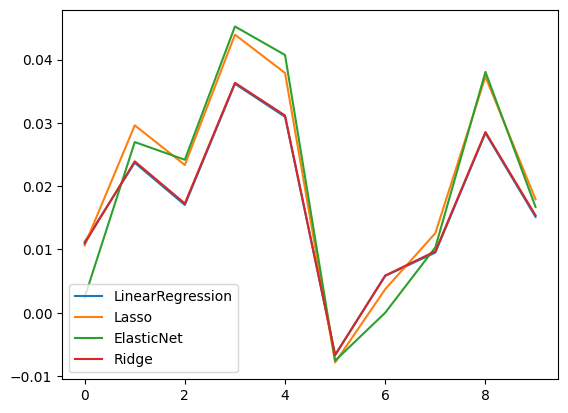

In [59]:
statsCV3 = TemporalCV(List_models=List_models, n_splits=10, X_data=X_train_2, y_data=y_train, max_train_size=20, test_size=20)
for key, item in statsCV3.items():
    plt.plot(item)
    print('Our ' + key + ' model obtained an average score of ' + str(np.round(np.mean(item), 4)) + ' in our CV scheme, with a standard deviation of ' + str(np.round(np.std(item), 4)))
plt.legend(statsCV3.keys()) 

Our LinearRegression model obtained an average score of 0.0318 in our CV scheme, with a standard deviation of 0.0158
Our Lasso model obtained an average score of 0.0381 in our CV scheme, with a standard deviation of 0.0177
Our ElasticNet model obtained an average score of 0.0396 in our CV scheme, with a standard deviation of 0.0184
Our Ridge model obtained an average score of 0.0321 in our CV scheme, with a standard deviation of 0.0158


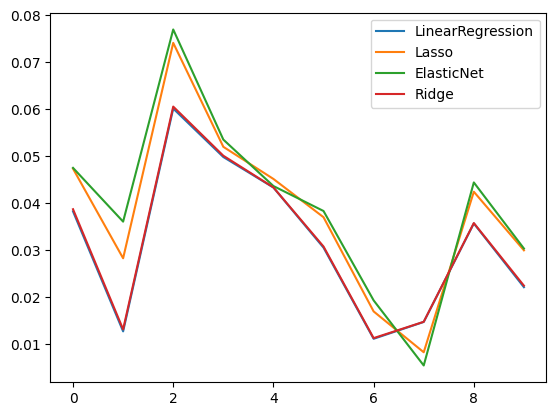

In [60]:
statsCV4 = TemporalCV(List_models=List_models, X_data=X_train_2, y_data=y_train, n_splits=10, max_train_size=20)
for key, item in statsCV4.items():
    plt.plot(item)
    print('Our ' + key + ' model obtained an average score of ' + str(np.round(np.mean(item), 4)) + ' in our CV scheme, with a standard deviation of ' + str(np.round(np.std(item), 4)))
plt.legend(statsCV4.keys()) 

Our LinearRegression model obtained an average score of 0.0329 in our CV scheme, with a standard deviation of 0.0137
Our Lasso model obtained an average score of 0.0342 in our CV scheme, with a standard deviation of 0.0156
Our ElasticNet model obtained an average score of 0.0339 in our CV scheme, with a standard deviation of 0.0166
Our Ridge model obtained an average score of 0.0329 in our CV scheme, with a standard deviation of 0.0137


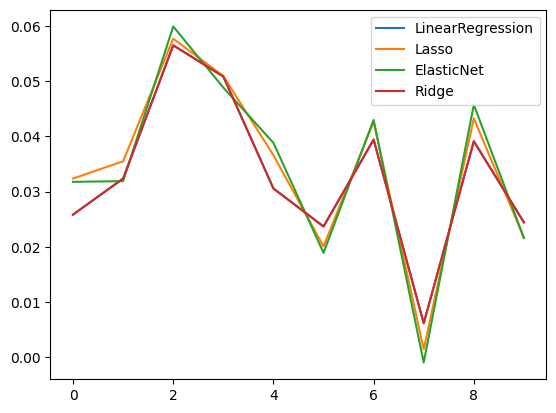

In [61]:
statsCV5 = TemporalCV(List_models=List_models,X_data=X_train_2, y_data = y_train,n_splits=10,max_train_size=60,test_size=20)
for key, item in statsCV5.items():
    plt.plot(item)
    print('Our ' + key + ' model obtained an average score of ' + str(np.round(np.mean(item), 4)) + ' in our CV scheme, with a standard deviation of ' + str(np.round(np.std(item), 4)))
plt.legend(statsCV5.keys()) 

Conclusion on linear models so far:

1. Bounding the sample size seems to clearly decrease performance. Our expanding window approach was the clear winner of our experiments.
2. Results have been quite good for Lasso and ElasticNet regression, consistently outperforming all other linear alternatives.
3. Our crafted features had a small positive effect in the average score.

### Future work/Alternative ideas

Here are some ideas to expand on the work presented in this notebook
1. Global universe dataset: As shown earlier, we can obtain a version of our data that does conform to a time series framework. With sufficiently detailed statistics, it would be possible to
obtain predictions about the properties of the next iteration of our universe. These predictions, made by models operating at a lower granularity than our data, could be combined in the form of constraints, neutralizations or conditions so that our predictions on the original target are fine tuned.
2. Ranking ML: One could sidestep the problem of predicting the target directly by attempting to rank the points directly. Techniques such as RankNet, LambdaRank or LambdaMART could be explored in the context of this problem.
3. Differential features: A whole array of features can be created that require information from previous dates to be constructed. This can equip our final dataset with information from previous steps without neccesarily using the lag functionality. These could include: The prediction of models trained on previous dates of the samples in current date, distance to the centroid point of the data in past dates to points in current date, ranking of points in current date among the samples of previous dates, closest neighbors of samples of current date to samples in past dates etc.
4. Feature subset selection: Our dataset has a considerable number of features, feature importance analysis and feature prunning techniques may result in improvements in performance.
5. Additional Feature engineering: Our approach depicts only a fraction of possible additional features that can be defined for this problem. Additional features could include effects such as rolling windows (from which averages, medians and ranges of values can be extracted) of values for different dates, or be of a completely different nature.
6. Additional data exploration: Our data exploration efforts were kept to a length compatible with a tutorial/introduction/bootstrapping notebook, most likely much finer detail and insight is still awaiting within the data.
7. Additional data preprocessing techniques: outliers detection to de-bias predictions, clustering in feature space etc.
8. Fine-tune the loss function: Models in this notebook were trained to minimize MSE. Alternatives that better align with our scoring metric should be explored as well.